# Gradient Boosting
"Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network." - https://machinelearningmastery.com/gradient-boosting-machine-ensemble-in-python/

"Let’s start by understanding Boosting! Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. The gradient boosting algorithm (gbm) can be most easily explained by first introducing the AdaBoost Algorithm.The AdaBoost Algorithm begins by training a decision tree in which each observation is assigned an equal weight. After evaluating the first tree, we increase the weights of those observations that are difficult to classify and lower the weights for those that are easy to classify. The second tree is therefore grown on this weighted data. Here, the idea is to improve upon the predictions of the first tree. Our new model is therefore Tree 1 + Tree 2. We then compute the classification error from this new 2-tree ensemble model and grow a third tree to predict the revised residuals. We repeat this process for a specified number of iterations. Subsequent trees help us to classify observations that are not well classified by the previous trees. Predictions of the final ensemble model is therefore the weighted sum of the predictions made by the previous tree models." - https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

"Gradient boosting is an effective machine learning algorithm and is often the main, or one of the main, algorithms used to win machine learning competitions (like Kaggle) on tabular and similar structured datasets."

## Heart Failure Prediction Dataset - Standardized

### Imports

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

data: pd.DataFrame = pd.read_csv('../../datasets/hf_scaled/HF_standardized.csv')

### Holdout

In [83]:
data: pd.DataFrame = pd.read_csv('../../datasets/heart_failure_clinical_records_dataset.csv')
    
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score (Training): 0.847
Accuracy score (Test): 0.933

Learning rate:  0.075
Accuracy score (Training): 0.876
Accuracy score (Test): 0.911

Learning rate:  0.1
Accuracy score (Training): 0.890
Accuracy score (Test): 0.900

Learning rate:  0.25
Accuracy score (Training): 0.938
Accuracy score (Test): 0.867

Learning rate:  0.5
Accuracy score (Training): 0.976
Accuracy score (Test): 0.833

Learning rate:  0.75
Accuracy score (Training): 0.995
Accuracy score (Test): 0.844

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.833



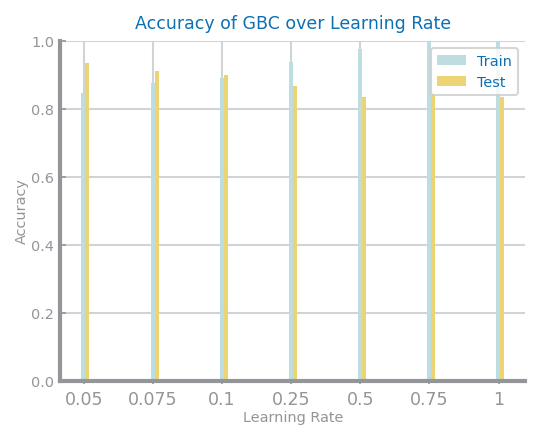

In [84]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = {"Train":[], "Test":[]}
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

Learning rate:  1
Accuracy score (Training): 0.957
Accuracy score (Test): 0.844

Learning rate:  1
Accuracy score (Training): 0.981
Accuracy score (Test): 0.833

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.811

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.811

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.844

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.833

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.833



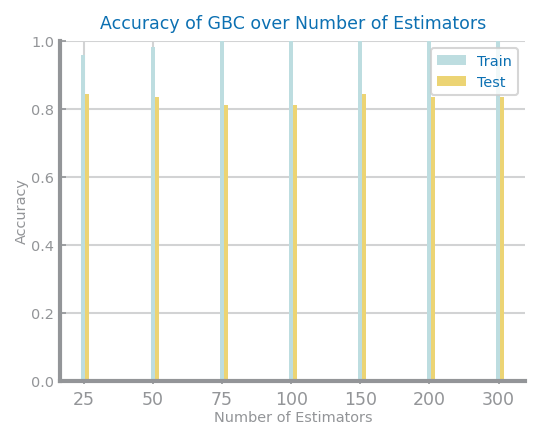

In [85]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = {"Train":[], "Test":[]}
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=0.25, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  1
Accuracy score (Training): 0.957
Accuracy score (Test): 0.844

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.822

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.722

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.733

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.733

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.733

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.733



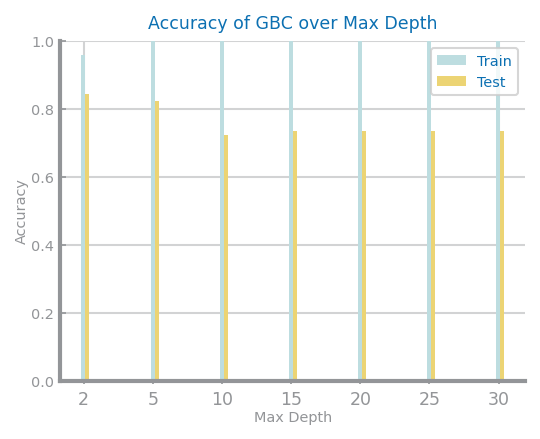

In [86]:
max_depth = [2, 5, 10, 15, 20, 25, 30]

xValues = ["2", "5", "10", "15", "20", "25", "30"]
yValues = {"Train":[], "Test":[]}
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=25, learning_rate=0.25, max_features=None, max_depth=depth, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Max Depth: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 2 ; No Estimators = 25 ; Learning Rate = 0.25

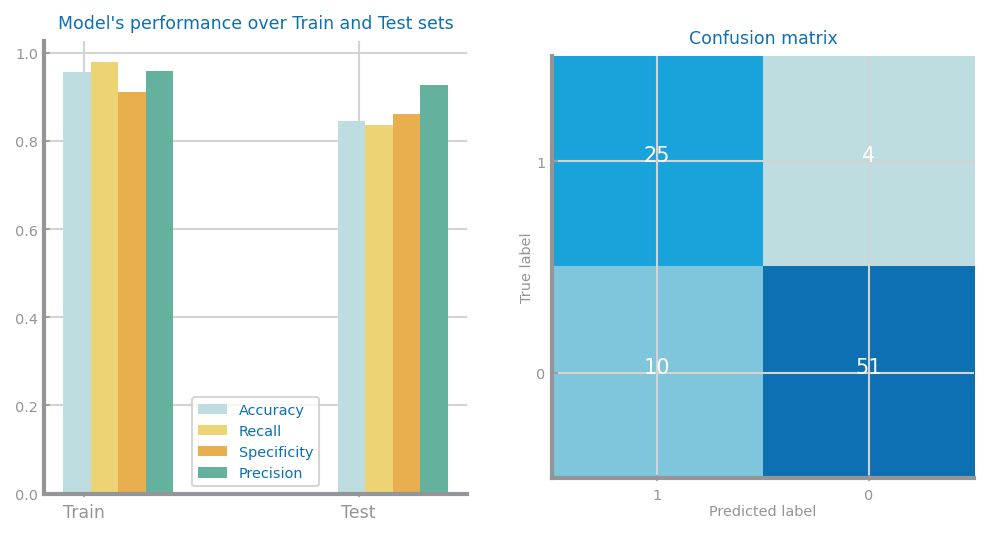

In [87]:
gb_clf = GradientBoostingClassifier(n_estimators=25, learning_rate=0.25, max_features=None, max_depth=2, random_state=0)

gb_clf.fit(X_train, y_train)
prd_trn = gb_clf.predict(X_train)
prd_tst = gb_clf.predict(X_test)

ds.plot_evaluation_results(labels, y_train, prd_trn, y_test, prd_tst)

### KFold

In [94]:
data: pd.DataFrame = pd.read_csv('../../datasets/heart_failure_clinical_records_dataset.csv')
    
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
kf = KFold(n_splits = 10, shuffle=True)

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score: 0.833

Learning rate:  0.075
Accuracy score: 0.836

Learning rate:  0.1
Accuracy score: 0.833

Learning rate:  0.25
Accuracy score: 0.823

Learning rate:  0.5
Accuracy score: 0.846

Learning rate:  0.75
Accuracy score: 0.806

Learning rate:  1
Accuracy score: 0.833



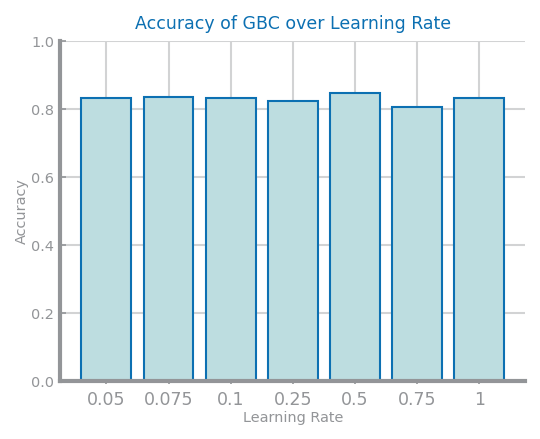

In [89]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = []
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

NUmber of Estimators:  1
Accuracy score: 0.853

NUmber of Estimators:  1
Accuracy score: 0.830

NUmber of Estimators:  1
Accuracy score: 0.806

NUmber of Estimators:  1
Accuracy score: 0.839

NUmber of Estimators:  1
Accuracy score: 0.816

NUmber of Estimators:  1
Accuracy score: 0.813

NUmber of Estimators:  1
Accuracy score: 0.796



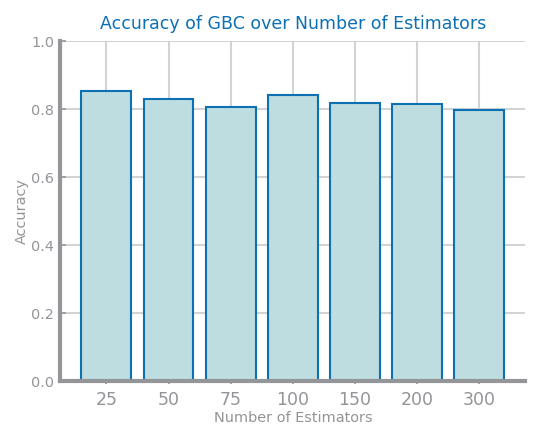

In [90]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = []
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=0.5, max_features=None, max_depth=2, random_state=0)

    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("NUmber of Estimators: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  1
Accuracy score: 0.829

Max Depth:  1
Accuracy score: 0.830

Max Depth:  1
Accuracy score: 0.776

Max Depth:  1
Accuracy score: 0.763

Max Depth:  1
Accuracy score: 0.779

Max Depth:  1
Accuracy score: 0.776

Max Depth:  1
Accuracy score: 0.769



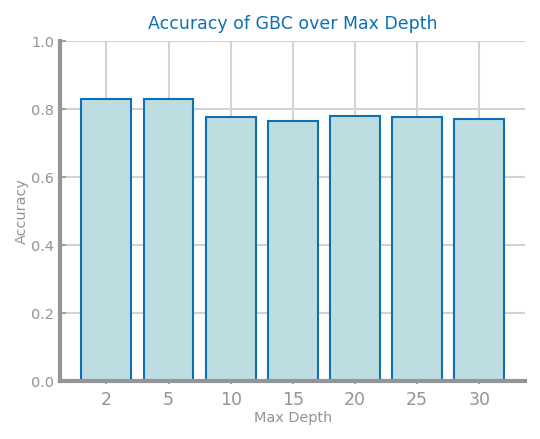

In [91]:
max_depth = [2, 5, 10, 15, 20, 25, 30]

xValues = ["2", "5", "10", "15", "20", "25", "30"]
yValues = []
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=25, learning_rate=0.5, max_features=None, max_depth=depth, random_state=0)
    
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Max Depth: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 2 ; No Estimators = 25 ; Learning Rate = 0.5

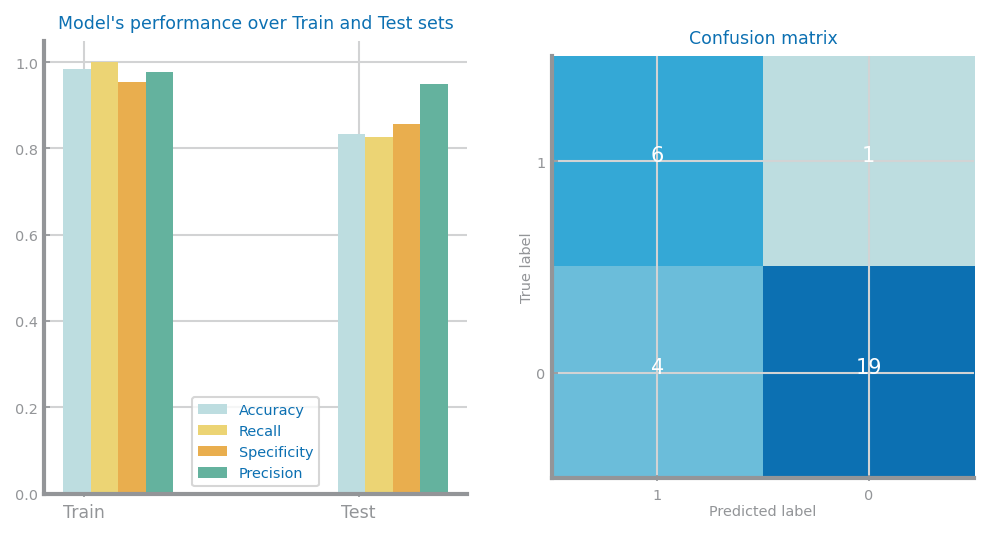

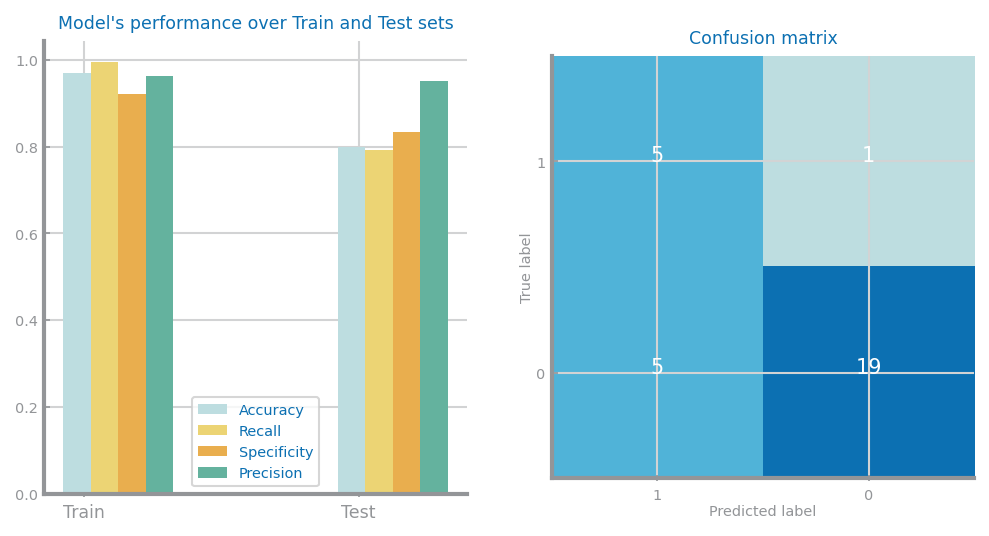

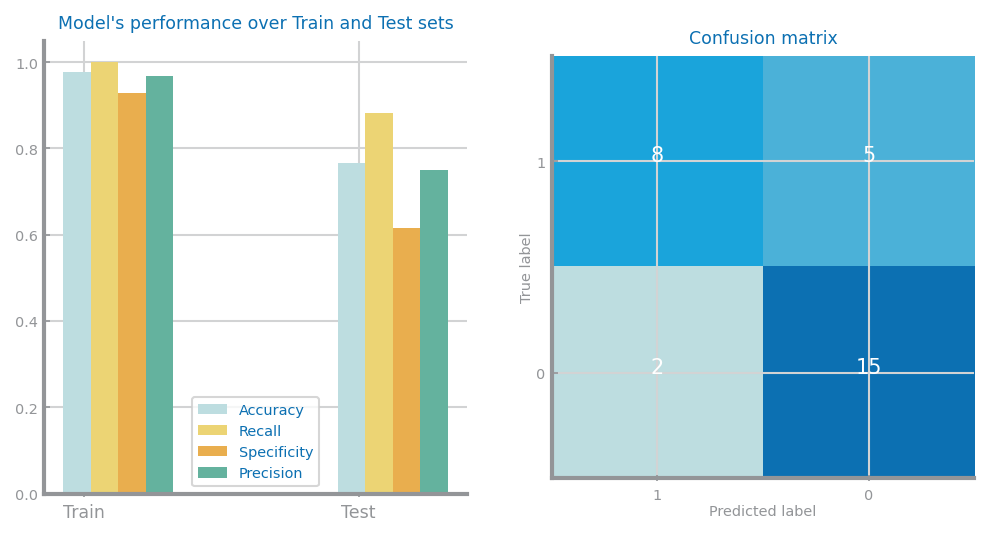

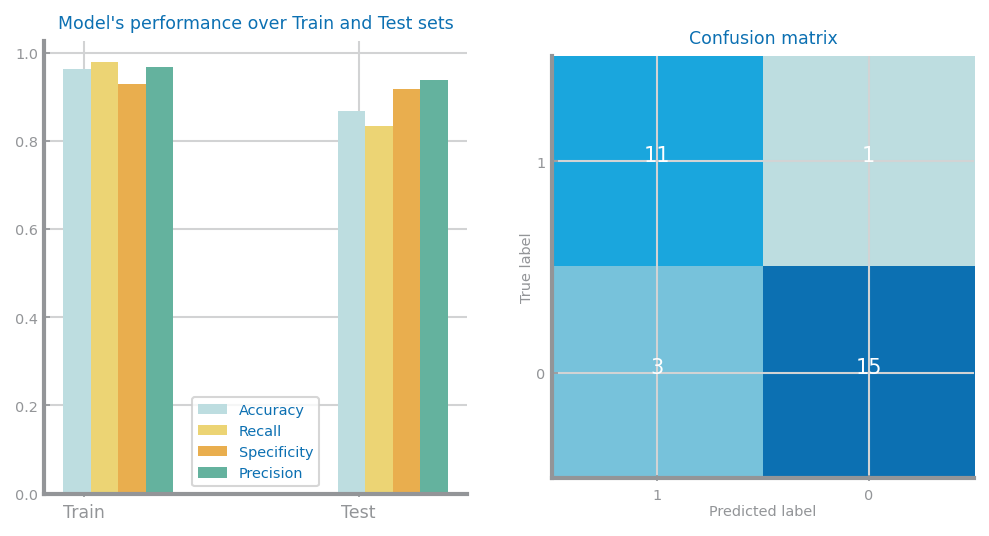

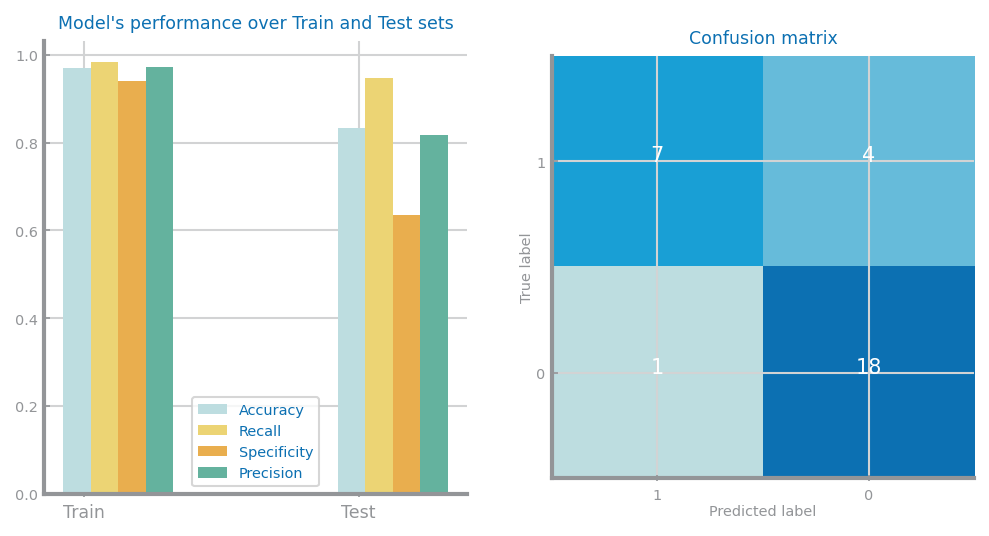

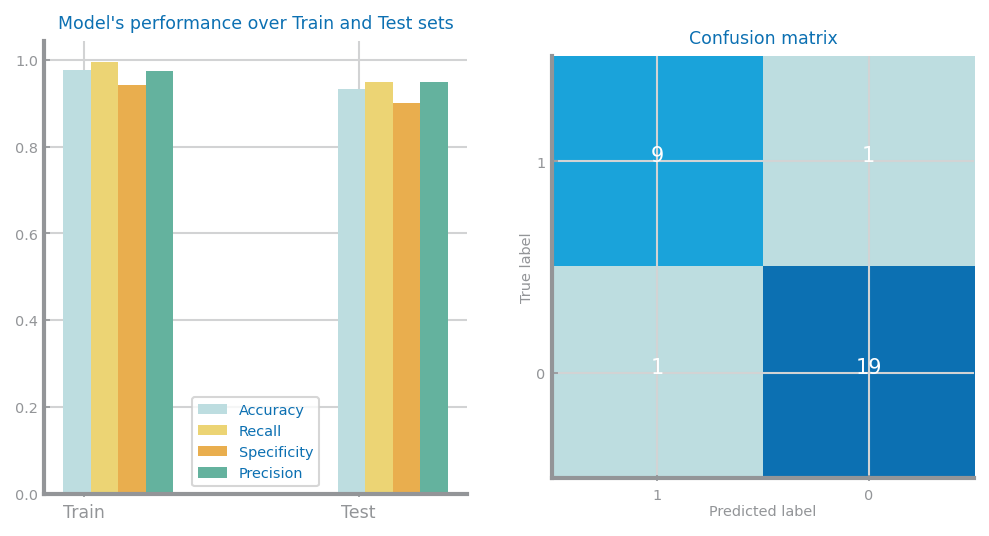

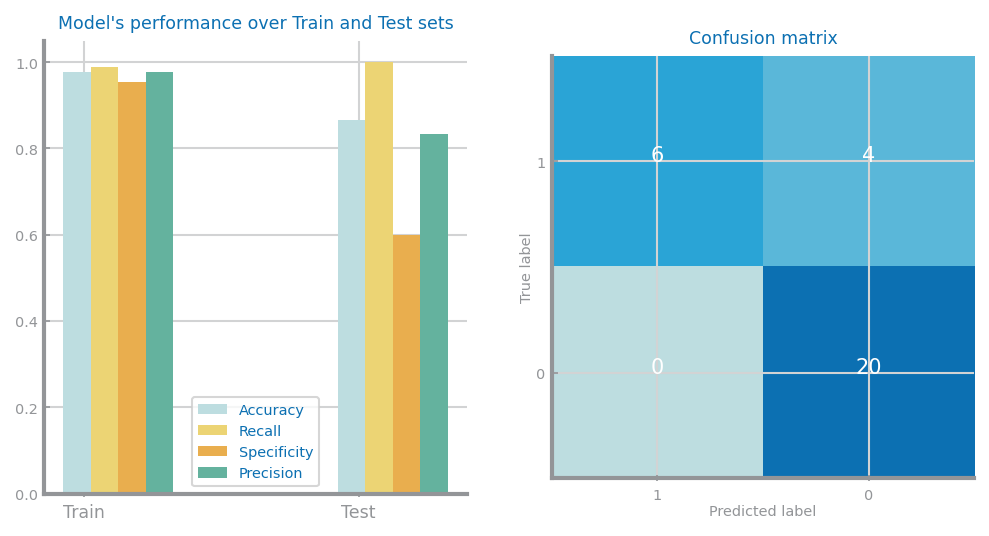

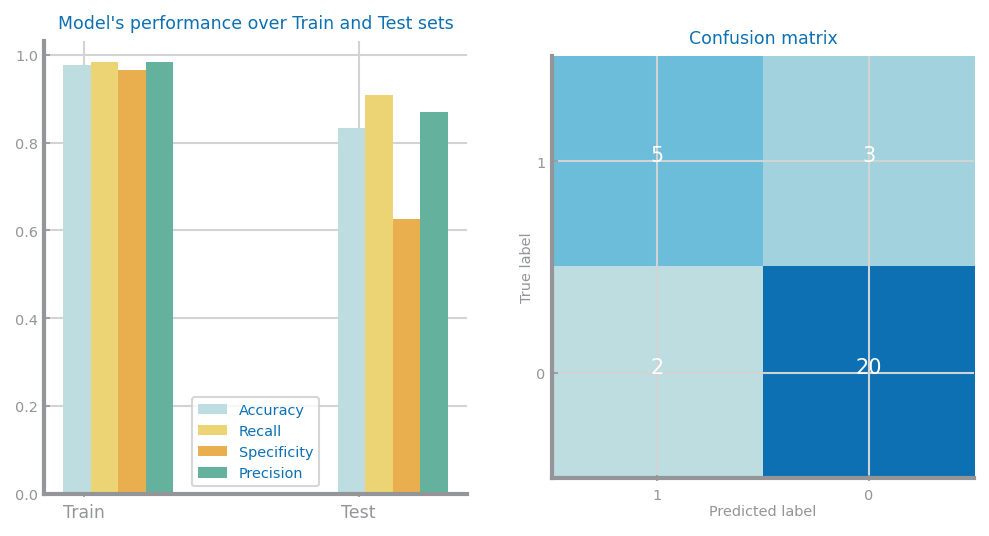

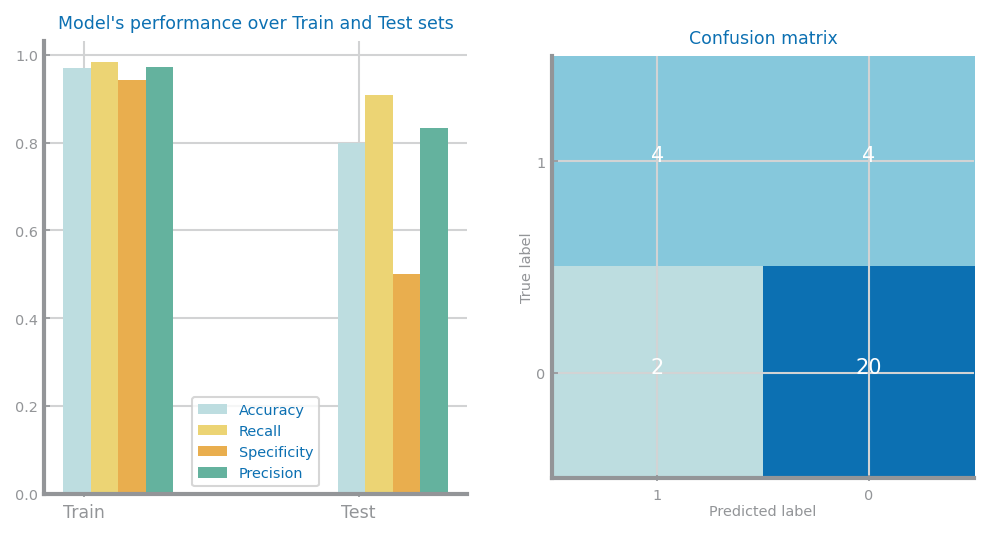

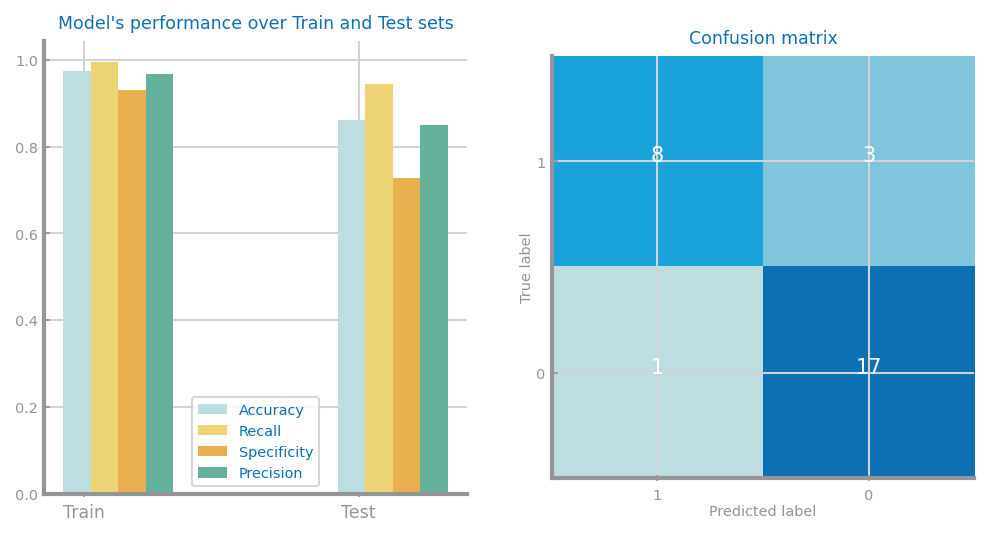

In [96]:
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    clf = GradientBoostingClassifier(n_estimators=25, learning_rate=0.5, max_features=None, max_depth=2, random_state=0)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    
    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

<br/>
<br/>
<br/>
<br/>
<br/>

## Heart Failure Prediction Dataset - Standardized + RFE + FG

### Imports

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_standardized_extra_rfe.csv')

### Holdout

In [98]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_standardized_extra_rfe.csv')    
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score (Training): 0.842
Accuracy score (Test): 0.889

Learning rate:  0.075
Accuracy score (Training): 0.866
Accuracy score (Test): 0.900

Learning rate:  0.1
Accuracy score (Training): 0.876
Accuracy score (Test): 0.900

Learning rate:  0.25
Accuracy score (Training): 0.904
Accuracy score (Test): 0.911

Learning rate:  0.5
Accuracy score (Training): 0.914
Accuracy score (Test): 0.889

Learning rate:  0.75
Accuracy score (Training): 0.976
Accuracy score (Test): 0.922

Learning rate:  1
Accuracy score (Training): 0.981
Accuracy score (Test): 0.900



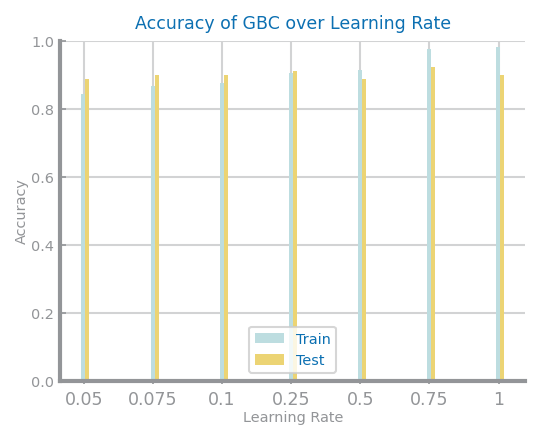

In [99]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = {"Train":[], "Test":[]}
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

Learning rate:  1
Accuracy score (Training): 0.995
Accuracy score (Test): 0.911

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.878

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.900

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.878

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.889

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.889

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.878



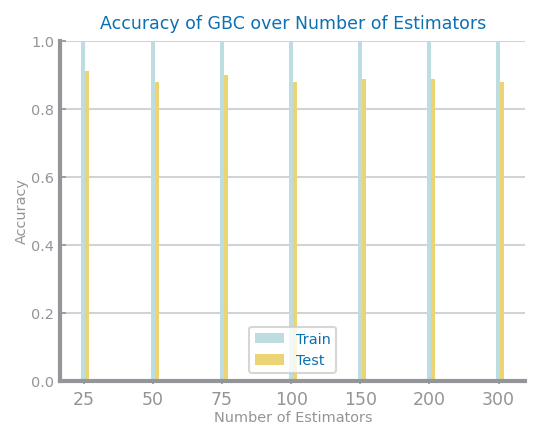

In [100]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = {"Train":[], "Test":[]}
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=0.75, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  1
Accuracy score (Training): 0.995
Accuracy score (Test): 0.911

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.867

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.767

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.767

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.767

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.767

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.767



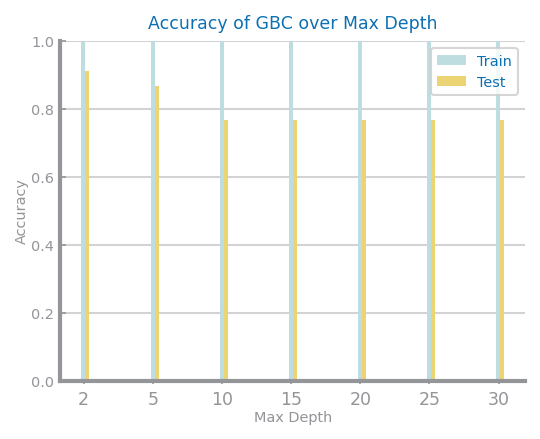

In [101]:
max_depth = [2, 5, 10, 15, 20, 25, 30]

xValues = ["2", "5", "10", "15", "20", "25", "30"]
yValues = {"Train":[], "Test":[]}
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=25, learning_rate=0.75, max_features=None, max_depth=depth, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Max Depth: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 2 ; No Estimators = 25 ; Learning Rate = 0.75

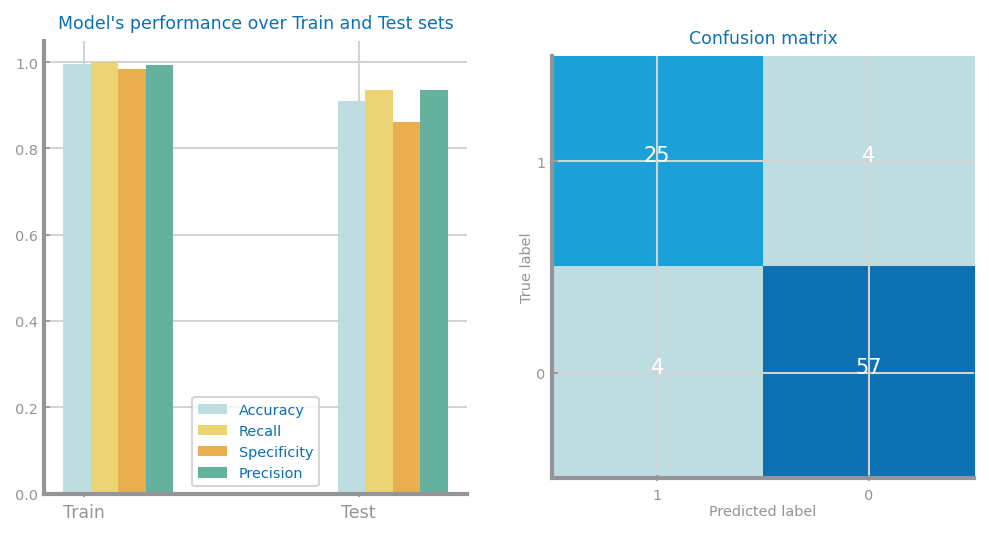

In [102]:
gb_clf = GradientBoostingClassifier(n_estimators=25, learning_rate=0.75, max_features=None, max_depth=2, random_state=0)

gb_clf.fit(X_train, y_train)
prd_trn = gb_clf.predict(X_train)
prd_tst = gb_clf.predict(X_test)

ds.plot_evaluation_results(labels, y_train, prd_trn, y_test, prd_tst)

### KFold

In [103]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_standardized_extra_rfe.csv')
    
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
kf = KFold(n_splits = 10, shuffle=True)

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score: 0.843

Learning rate:  0.075
Accuracy score: 0.846

Learning rate:  0.1
Accuracy score: 0.846

Learning rate:  0.25
Accuracy score: 0.829

Learning rate:  0.5
Accuracy score: 0.826

Learning rate:  0.75
Accuracy score: 0.816

Learning rate:  1
Accuracy score: 0.809



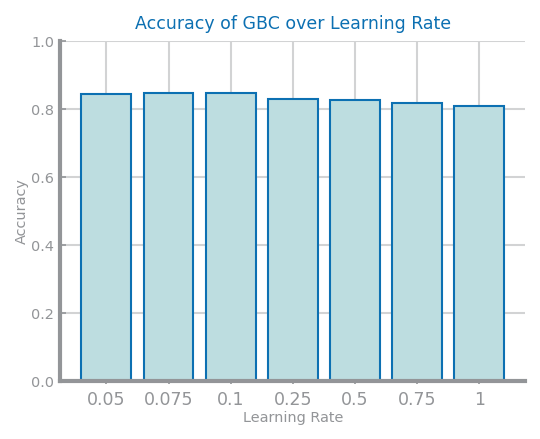

In [105]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = []
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

NUmber of Estimators:  1
Accuracy score: 0.830

NUmber of Estimators:  1
Accuracy score: 0.850

NUmber of Estimators:  1
Accuracy score: 0.829

NUmber of Estimators:  1
Accuracy score: 0.849

NUmber of Estimators:  1
Accuracy score: 0.839

NUmber of Estimators:  1
Accuracy score: 0.830

NUmber of Estimators:  1
Accuracy score: 0.833



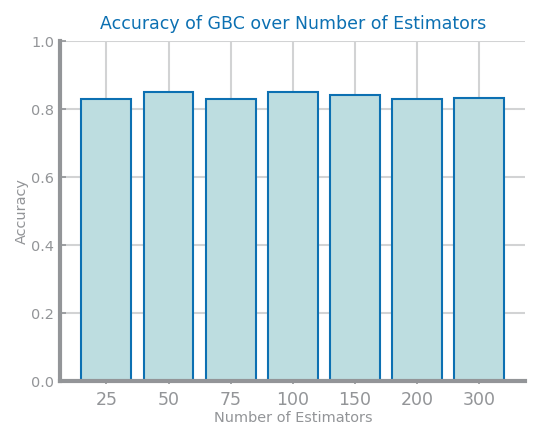

In [106]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = []
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=0.1, max_features=None, max_depth=2, random_state=0)

    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("NUmber of Estimators: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  1
Accuracy score: 0.840

Max Depth:  1
Accuracy score: 0.826

Max Depth:  1
Accuracy score: 0.763

Max Depth:  1
Accuracy score: 0.760

Max Depth:  1
Accuracy score: 0.736

Max Depth:  1
Accuracy score: 0.759

Max Depth:  1
Accuracy score: 0.749



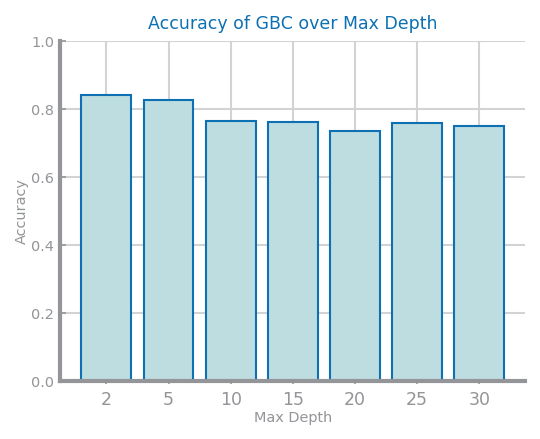

In [107]:
max_depth = [2, 5, 10, 15, 20, 25, 30]

xValues = ["2", "5", "10", "15", "20", "25", "30"]
yValues = []
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_features=None, max_depth=depth, random_state=0)
    
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Max Depth: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 2 ; No Estimators = 50 ; Learning Rate = 0.1

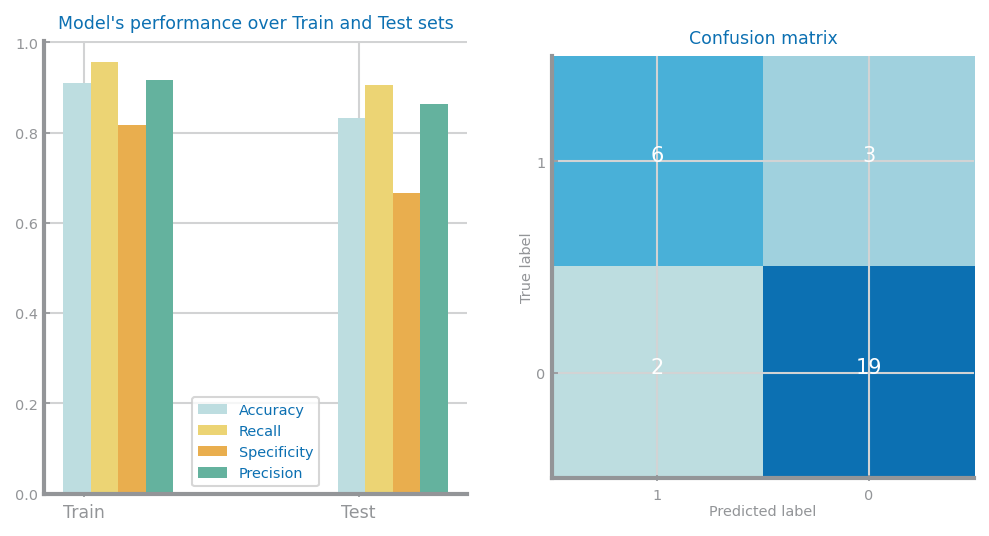

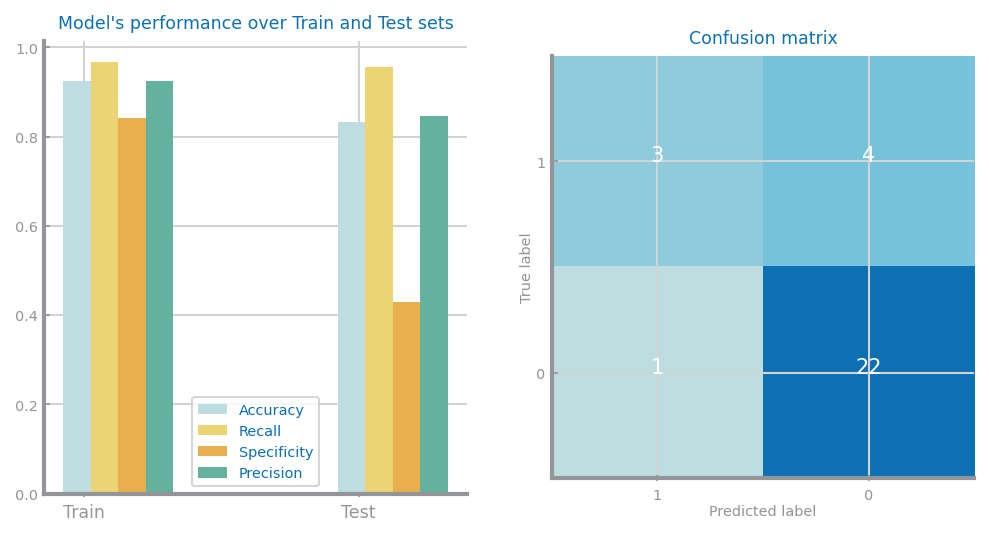

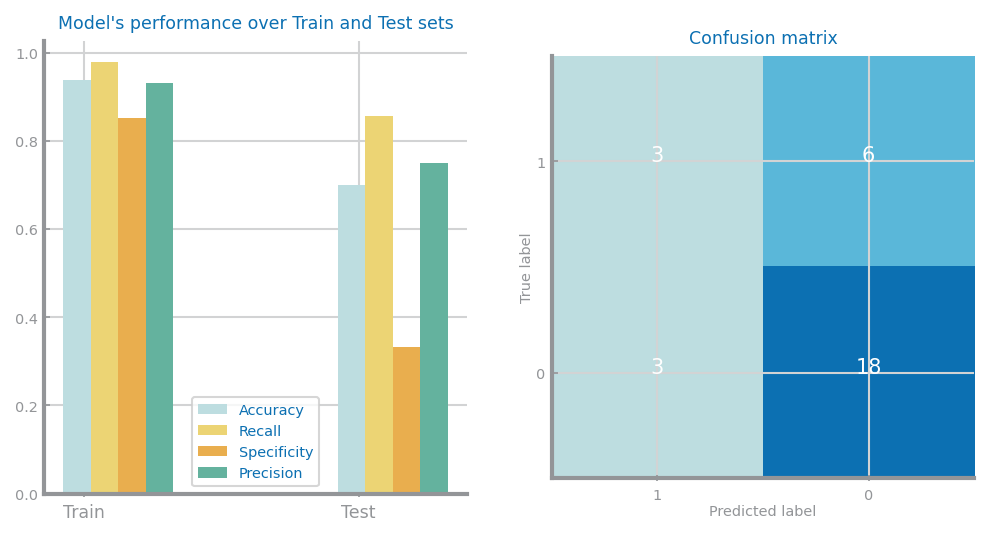

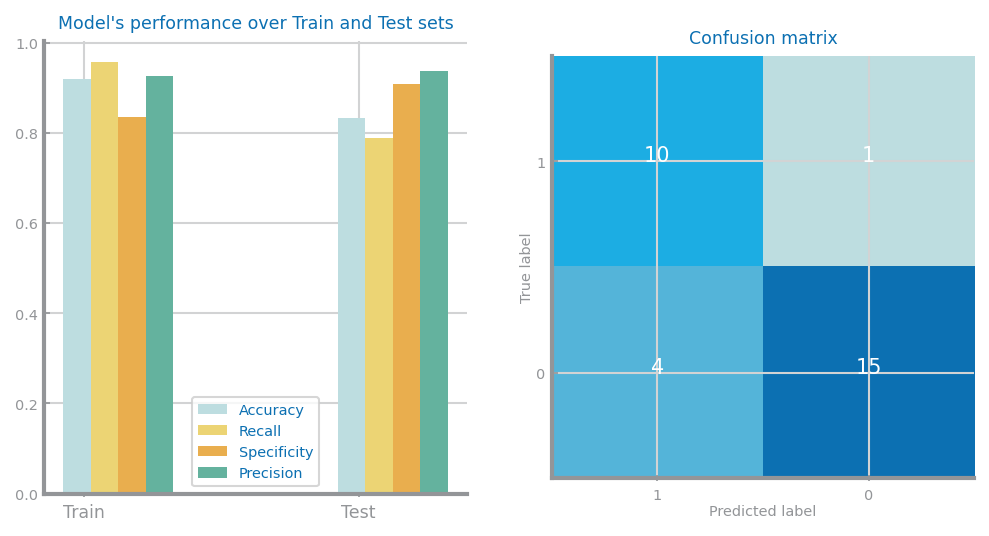

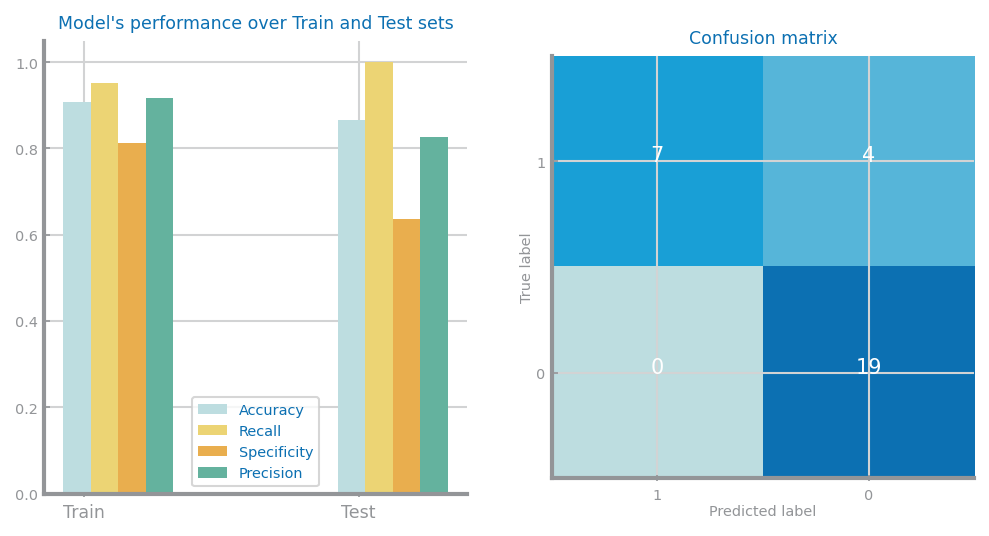

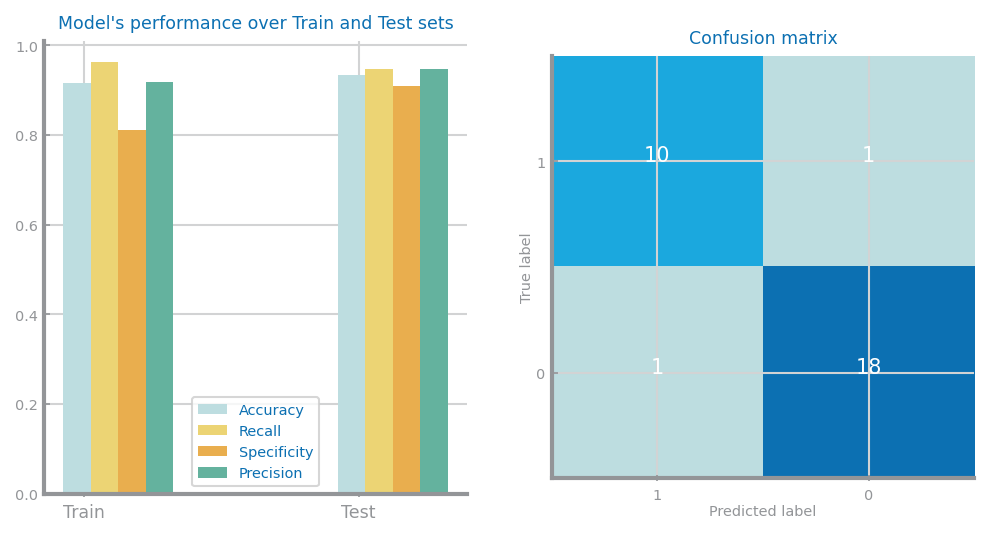

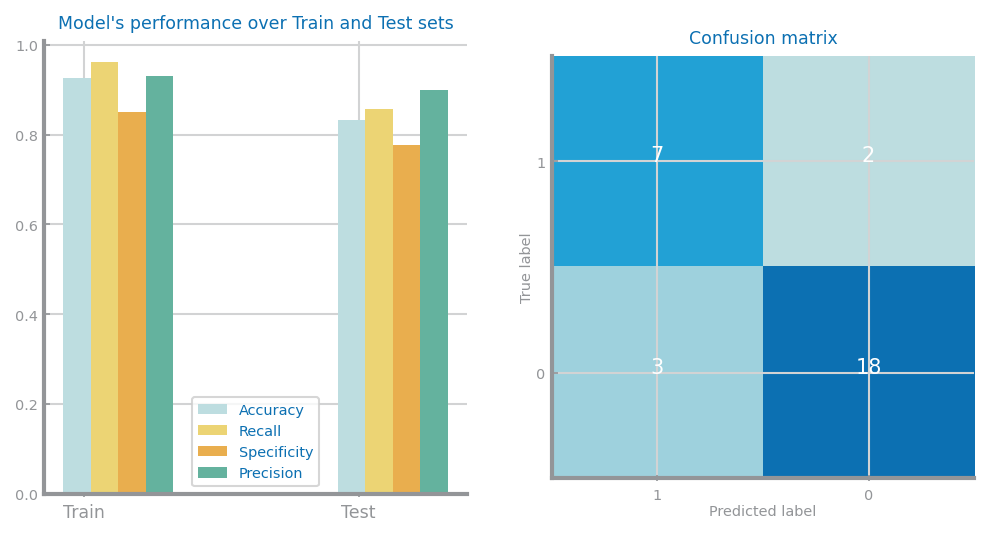

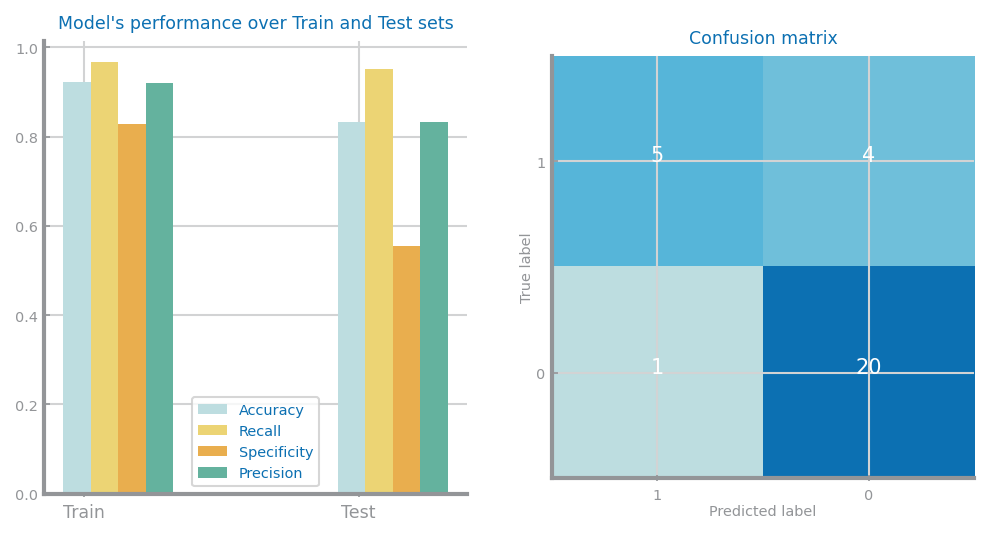

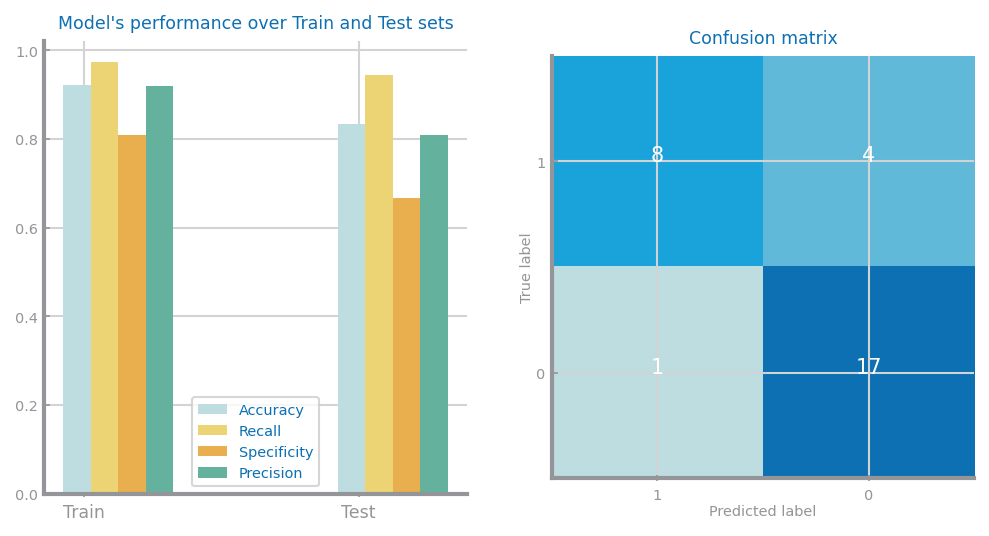

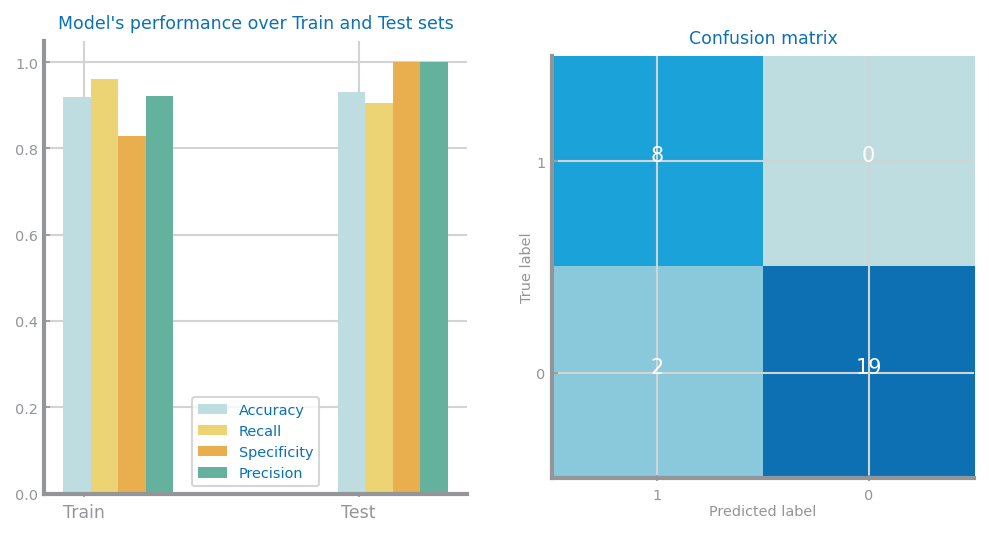

In [108]:
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_features=None, max_depth=2, random_state=0)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    
    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

<br/>
<br/>
<br/>
<br/>
<br/>

## Heart Failure Prediction Dataset - Standardized + ANOVA + FG + Outlier + Balancing

### Imports

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HF_S_FAnova_extra_outlierTrim_IQS_B.csv')

### Holdout

In [110]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HF_S_FAnova_extra_outlierTrim_IQS_B.csv')
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score (Training): 0.898
Accuracy score (Test): 0.776

Learning rate:  0.075
Accuracy score (Training): 0.924
Accuracy score (Test): 0.812

Learning rate:  0.1
Accuracy score (Training): 0.929
Accuracy score (Test): 0.859

Learning rate:  0.25
Accuracy score (Training): 0.975
Accuracy score (Test): 0.882

Learning rate:  0.5
Accuracy score (Training): 0.995
Accuracy score (Test): 0.894

Learning rate:  0.75
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.871



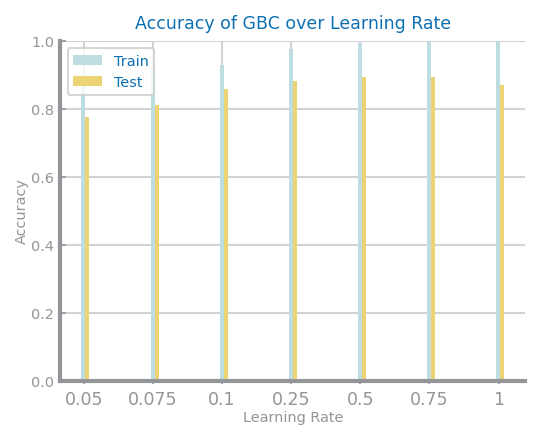

In [111]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = {"Train":[], "Test":[]}
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.918

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.906

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.906

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.882



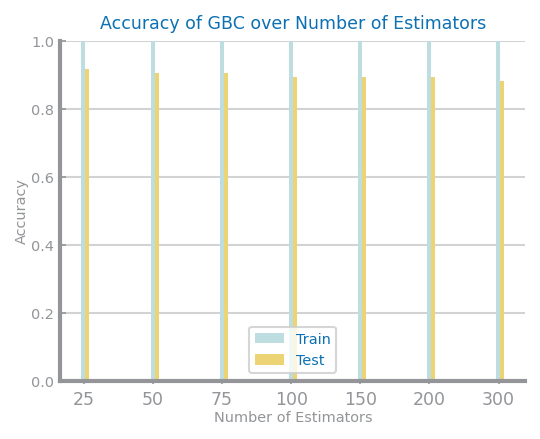

In [112]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = {"Train":[], "Test":[]}
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=0.75, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.918

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.835

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.835

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.835

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.824

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.824



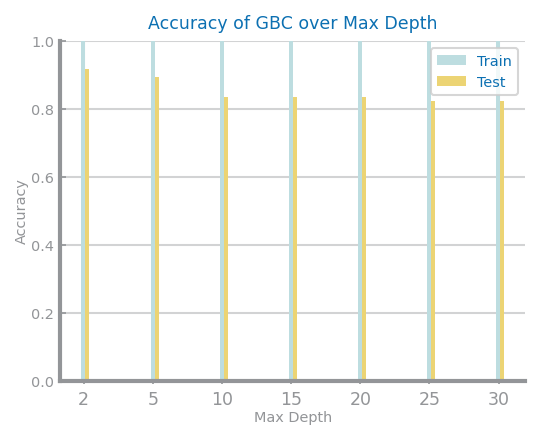

In [113]:
max_depth = [2, 5, 10, 15, 20, 25, 30]

xValues = ["2", "5", "10", "15", "20", "25", "30"]
yValues = {"Train":[], "Test":[]}
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=25, learning_rate=0.75, max_features=None, max_depth=depth, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Max Depth: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 2 ; No Estimators = 25 ; Learning Rate = 0.75

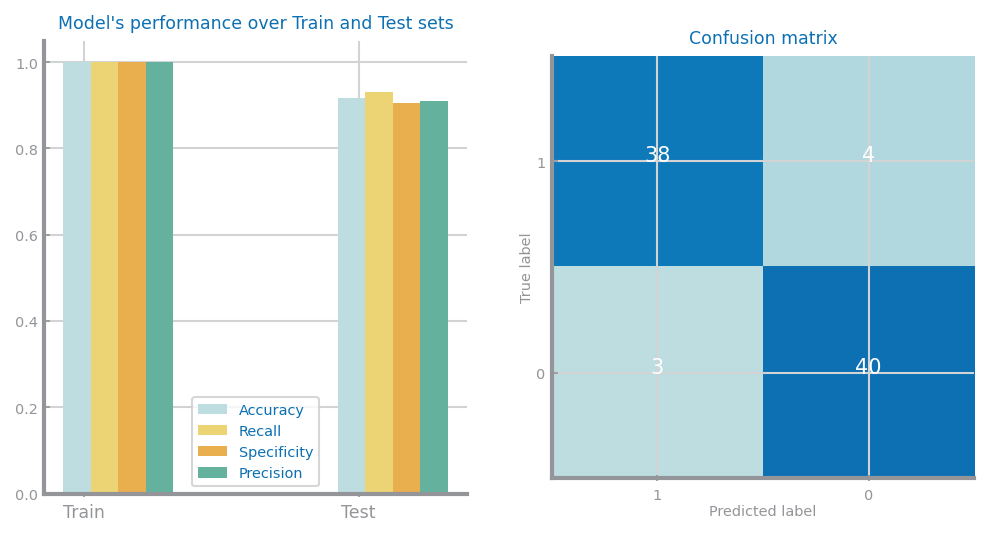

In [114]:
gb_clf = GradientBoostingClassifier(n_estimators=25, learning_rate=0.75, max_features=None, max_depth=2, random_state=0)

gb_clf.fit(X_train, y_train)
prd_trn = gb_clf.predict(X_train)
prd_tst = gb_clf.predict(X_test)

ds.plot_evaluation_results(labels, y_train, prd_trn, y_test, prd_tst)

### KFold

In [115]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HF_S_FAnova_extra_outlierTrim_IQS_B.csv')
    
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
kf = KFold(n_splits = 10, shuffle=True)

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score: 0.823

Learning rate:  0.075
Accuracy score: 0.869

Learning rate:  0.1
Accuracy score: 0.861

Learning rate:  0.25
Accuracy score: 0.886

Learning rate:  0.5
Accuracy score: 0.890

Learning rate:  0.75
Accuracy score: 0.919

Learning rate:  1
Accuracy score: 0.887



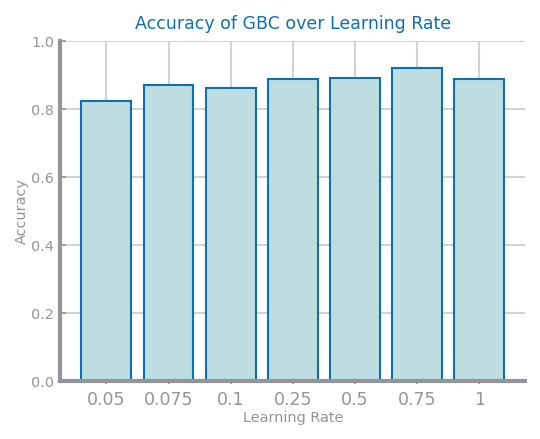

In [116]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = []
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

NUmber of Estimators:  1
Accuracy score: 0.893

NUmber of Estimators:  1
Accuracy score: 0.887

NUmber of Estimators:  1
Accuracy score: 0.901

NUmber of Estimators:  1
Accuracy score: 0.904

NUmber of Estimators:  1
Accuracy score: 0.897

NUmber of Estimators:  1
Accuracy score: 0.918

NUmber of Estimators:  1
Accuracy score: 0.897



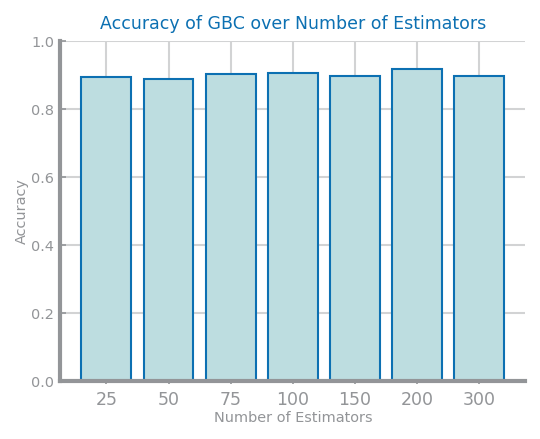

In [117]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = []
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=0.75, max_features=None, max_depth=2, random_state=0)

    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("NUmber of Estimators: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  1
Accuracy score: 0.879

Max Depth:  1
Accuracy score: 0.915

Max Depth:  1
Accuracy score: 0.816

Max Depth:  1
Accuracy score: 0.812

Max Depth:  1
Accuracy score: 0.826

Max Depth:  1
Accuracy score: 0.841

Max Depth:  1
Accuracy score: 0.837



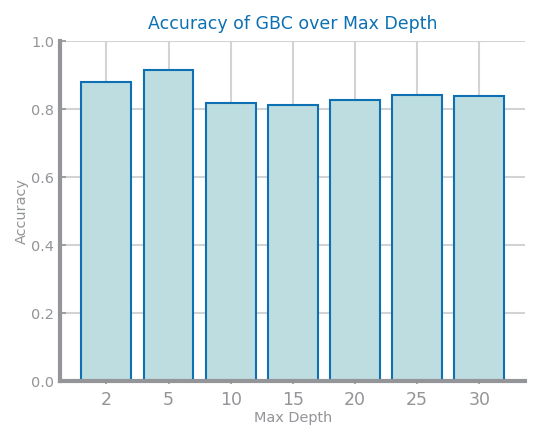

In [118]:
max_depth = [2, 5, 10, 15, 20, 25, 30]

xValues = ["2", "5", "10", "15", "20", "25", "30"]
yValues = []
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.75, max_features=None, max_depth=depth, random_state=0)
    
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Max Depth: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 5 ; No Estimators = 200 ; Learning Rate = 0.75

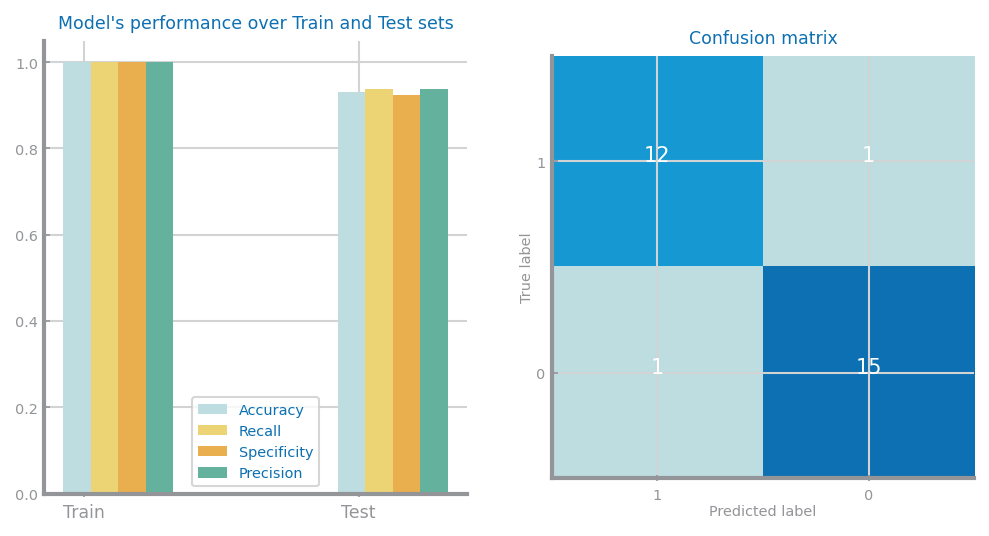

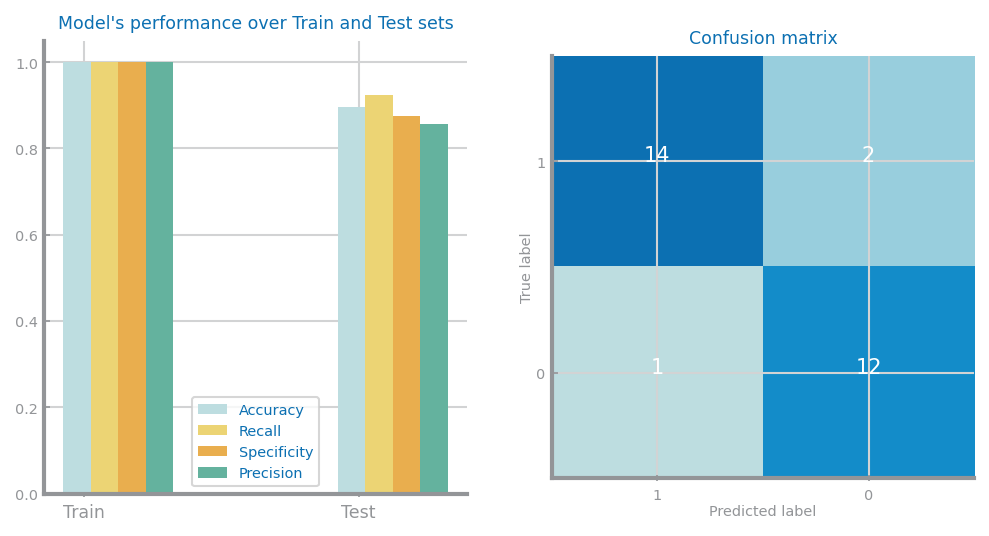

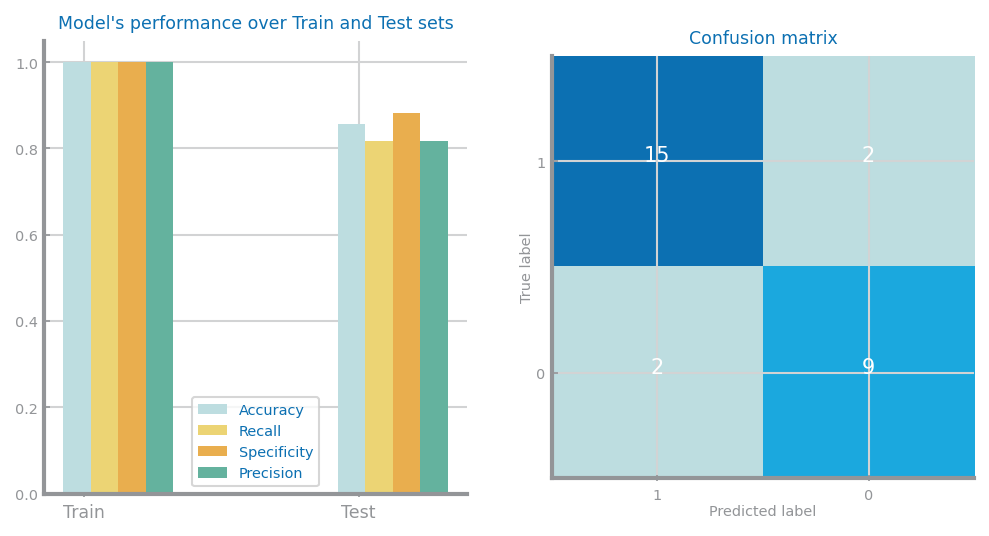

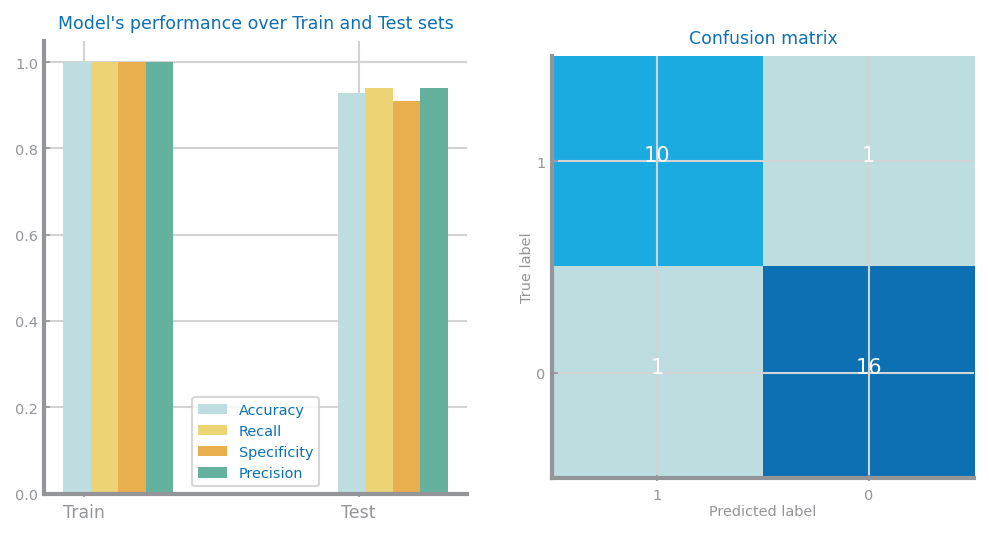

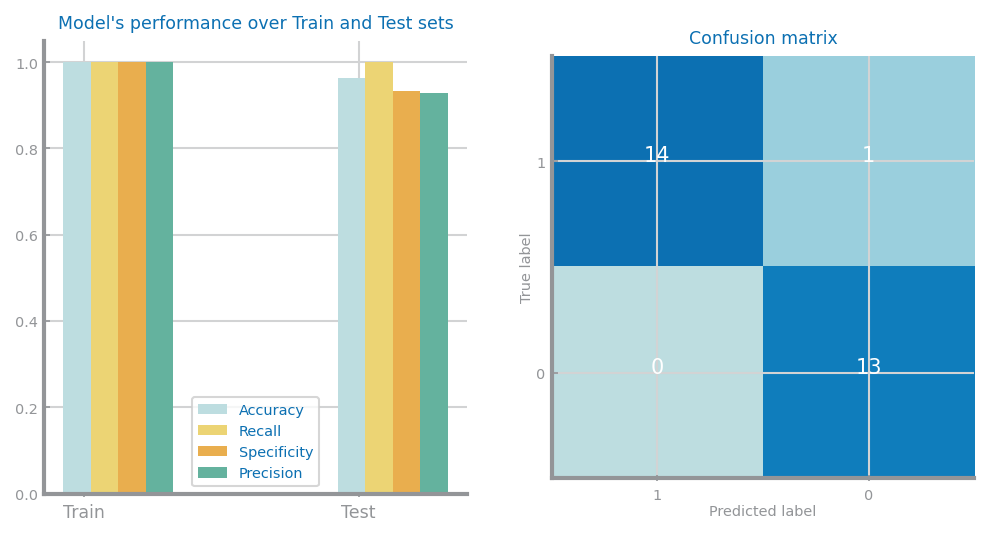

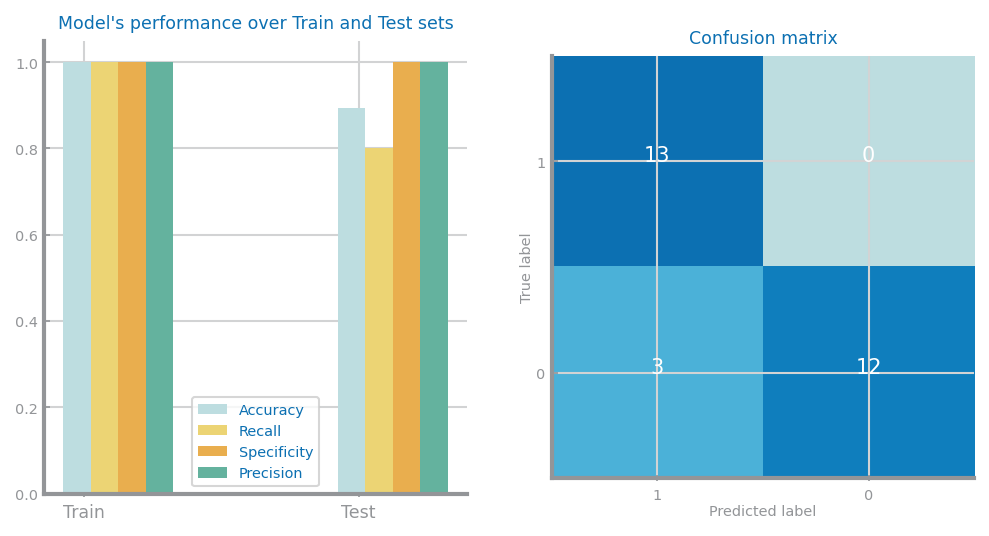

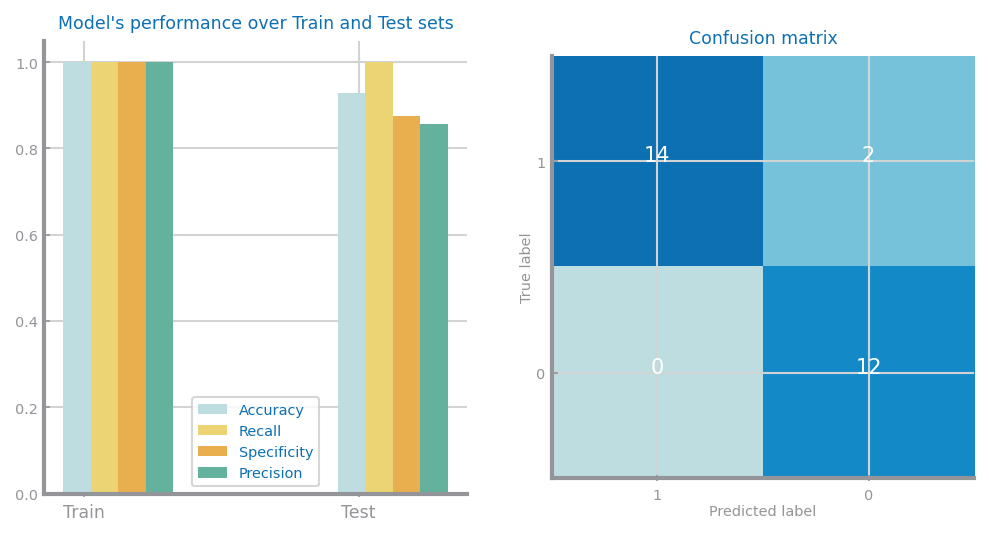

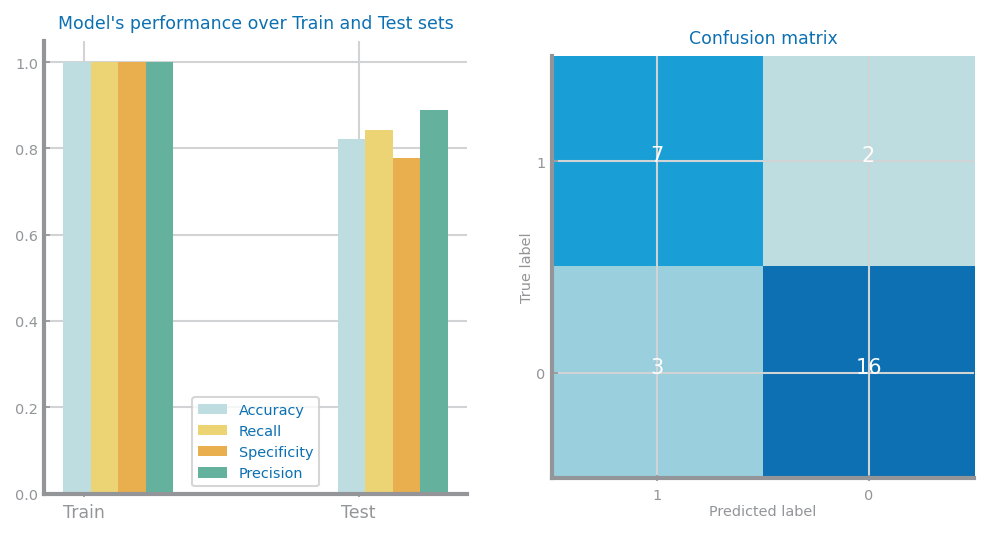

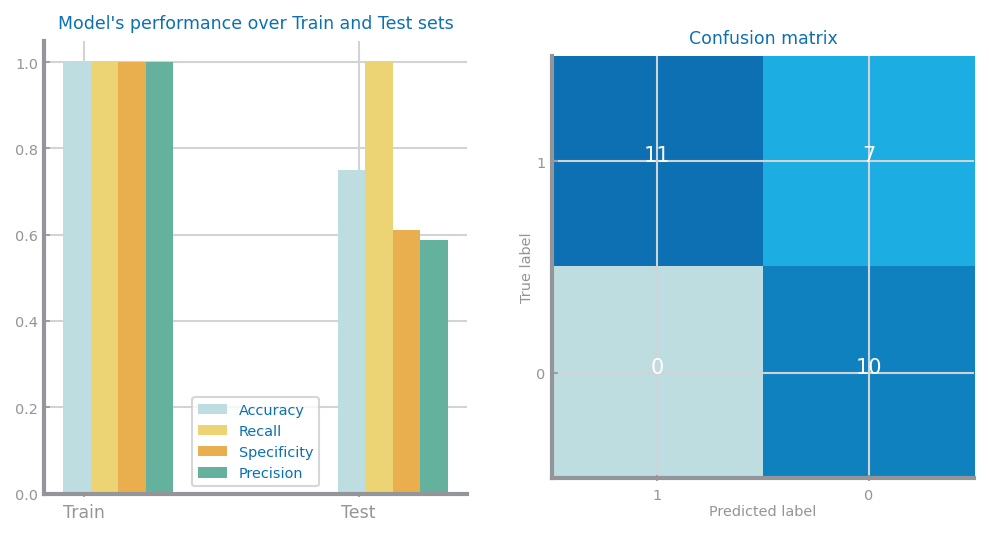

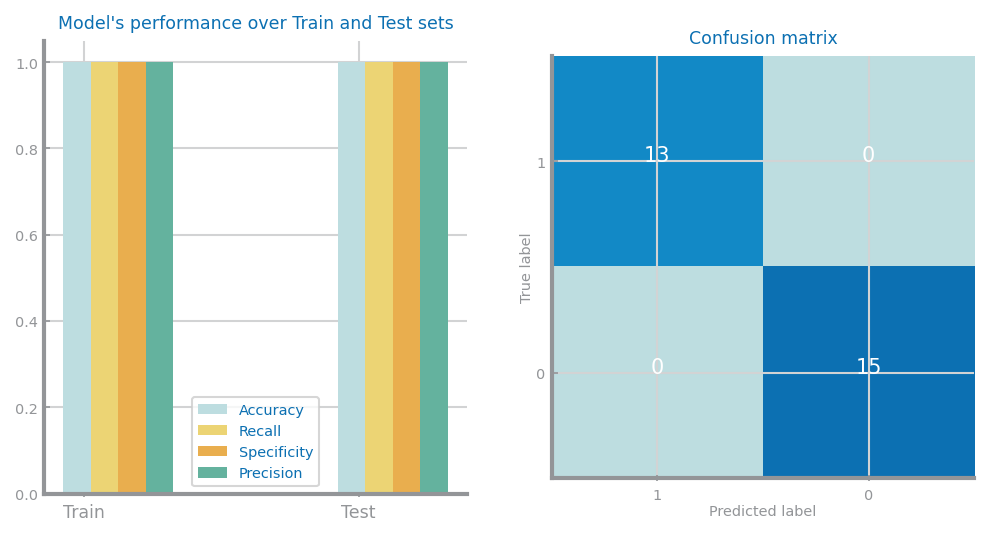

In [119]:
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.75, max_features=None, max_depth=5, random_state=0)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    
    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

<br/>
<br/>
<br/>
<br/>
<br/>

## Heart Failure Prediction Dataset - Standardized + Importance + FG + Outlier + Balancing

### Imports

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FImp_extra_outlierTrim_IQS_B.csv')

### Holdout

In [121]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FImp_extra_outlierTrim_IQS_B.csv')
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score (Training): 0.883
Accuracy score (Test): 0.824

Learning rate:  0.075
Accuracy score (Training): 0.898
Accuracy score (Test): 0.824

Learning rate:  0.1
Accuracy score (Training): 0.924
Accuracy score (Test): 0.847

Learning rate:  0.25
Accuracy score (Training): 0.985
Accuracy score (Test): 0.882

Learning rate:  0.5
Accuracy score (Training): 0.995
Accuracy score (Test): 0.871

Learning rate:  0.75
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.918



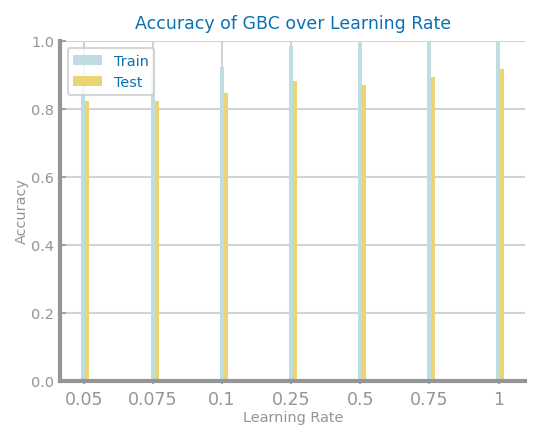

In [122]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = {"Train":[], "Test":[]}
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

Learning rate:  1
Accuracy score (Training): 0.939
Accuracy score (Test): 0.894

Learning rate:  1
Accuracy score (Training): 0.990
Accuracy score (Test): 0.894

Learning rate:  1
Accuracy score (Training): 0.995
Accuracy score (Test): 0.894

Learning rate:  1
Accuracy score (Training): 0.995
Accuracy score (Test): 0.894

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.906

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.906

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.906



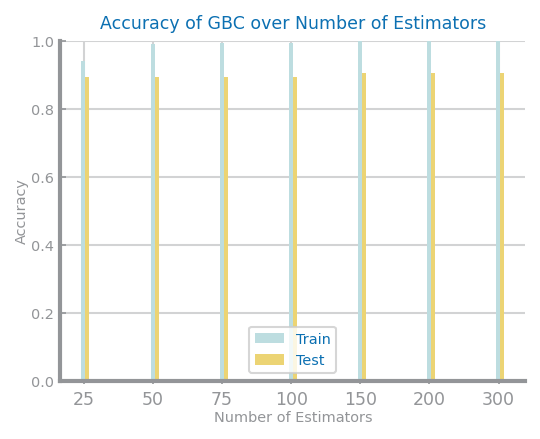

In [123]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = {"Train":[], "Test":[]}
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=0.1, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.918

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.906

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.882

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894



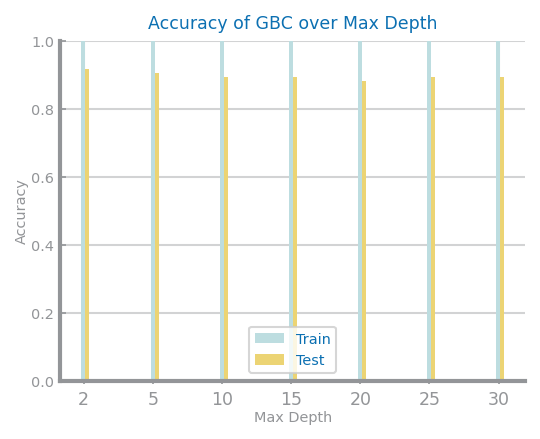

In [124]:
max_depth = [2, 5, 10, 15, 20, 25, 30]

xValues = ["2", "5", "10", "15", "20", "25", "30"]
yValues = {"Train":[], "Test":[]}
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_features=None, max_depth=depth, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Max Depth: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 2 ; No Estimators = 100 ; Learning Rate = 1

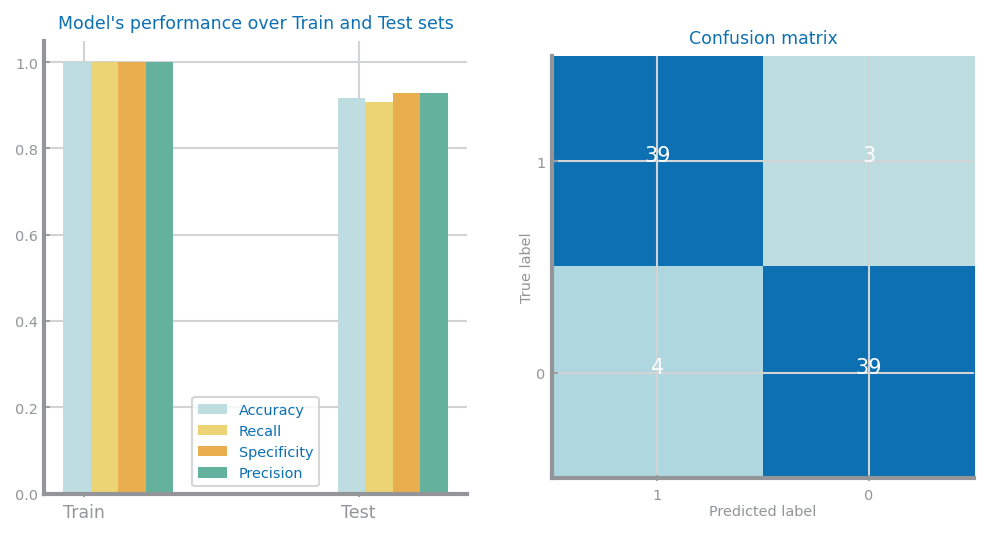

In [125]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_features=None, max_depth=2, random_state=0)

gb_clf.fit(X_train, y_train)
prd_trn = gb_clf.predict(X_train)
prd_tst = gb_clf.predict(X_test)

ds.plot_evaluation_results(labels, y_train, prd_trn, y_test, prd_tst)

### KFold

In [126]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FImp_extra_outlierTrim_IQS_B.csv')
    
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
kf = KFold(n_splits = 10, shuffle=True)

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score: 0.823

Learning rate:  0.075
Accuracy score: 0.855

Learning rate:  0.1
Accuracy score: 0.869

Learning rate:  0.25
Accuracy score: 0.894

Learning rate:  0.5
Accuracy score: 0.915

Learning rate:  0.75
Accuracy score: 0.890

Learning rate:  1
Accuracy score: 0.893



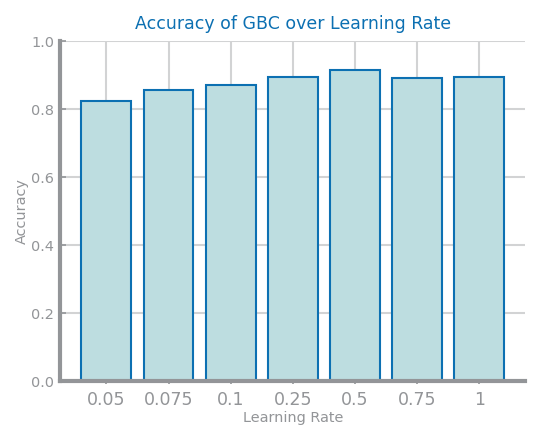

In [127]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = []
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

NUmber of Estimators:  1
Accuracy score: 0.897

NUmber of Estimators:  1
Accuracy score: 0.915

NUmber of Estimators:  1
Accuracy score: 0.897

NUmber of Estimators:  1
Accuracy score: 0.901

NUmber of Estimators:  1
Accuracy score: 0.908

NUmber of Estimators:  1
Accuracy score: 0.915

NUmber of Estimators:  1
Accuracy score: 0.900



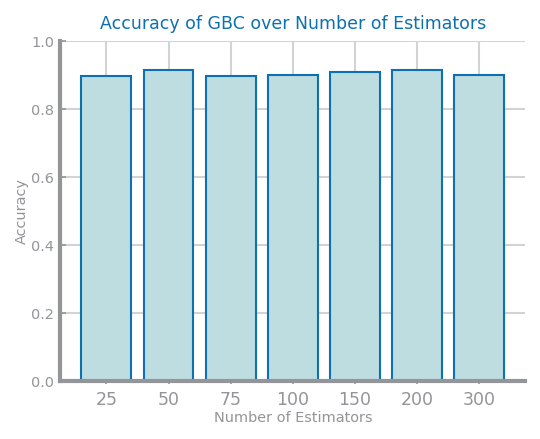

In [128]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = []
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=0.5, max_features=None, max_depth=2, random_state=0)

    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("NUmber of Estimators: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  1
Accuracy score: 0.901

Max Depth:  1
Accuracy score: 0.894

Max Depth:  1
Accuracy score: 0.851

Max Depth:  1
Accuracy score: 0.830

Max Depth:  1
Accuracy score: 0.809

Max Depth:  1
Accuracy score: 0.819

Max Depth:  1
Accuracy score: 0.833



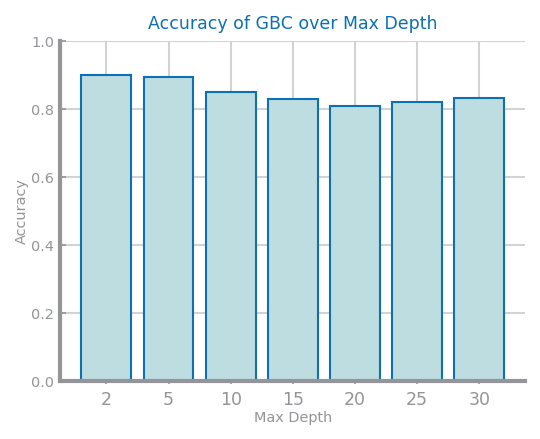

In [129]:
max_depth = [2, 5, 10, 15, 20, 25, 30]

xValues = ["2", "5", "10", "15", "20", "25", "30"]
yValues = []
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_features=None, max_depth=depth, random_state=0)
    
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Max Depth: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 2; No Estimators = 50 ; Learning Rate = 0.5

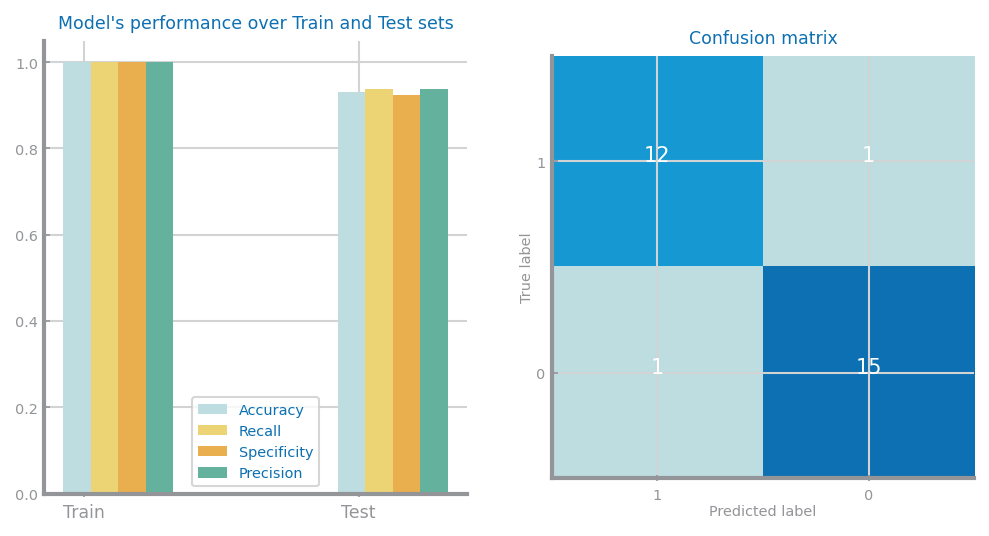

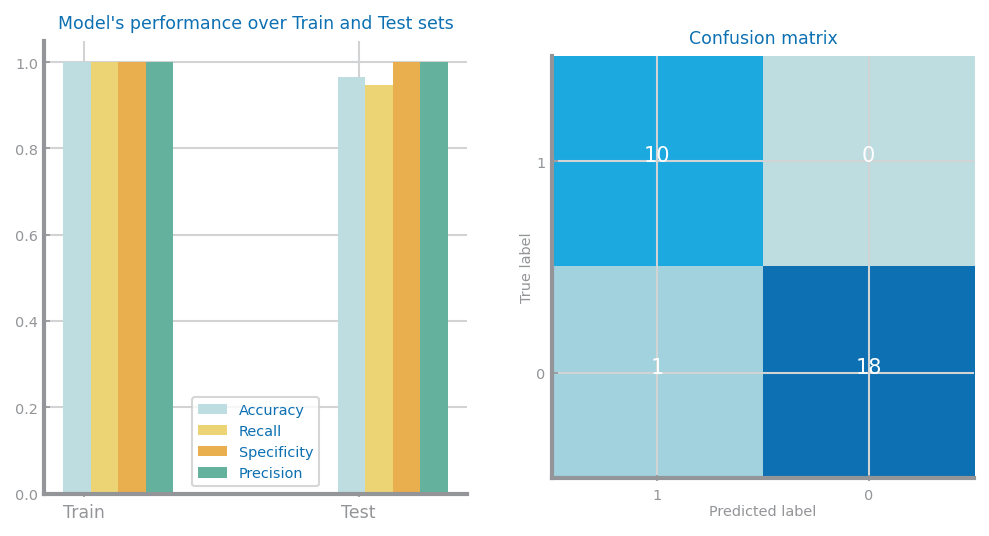

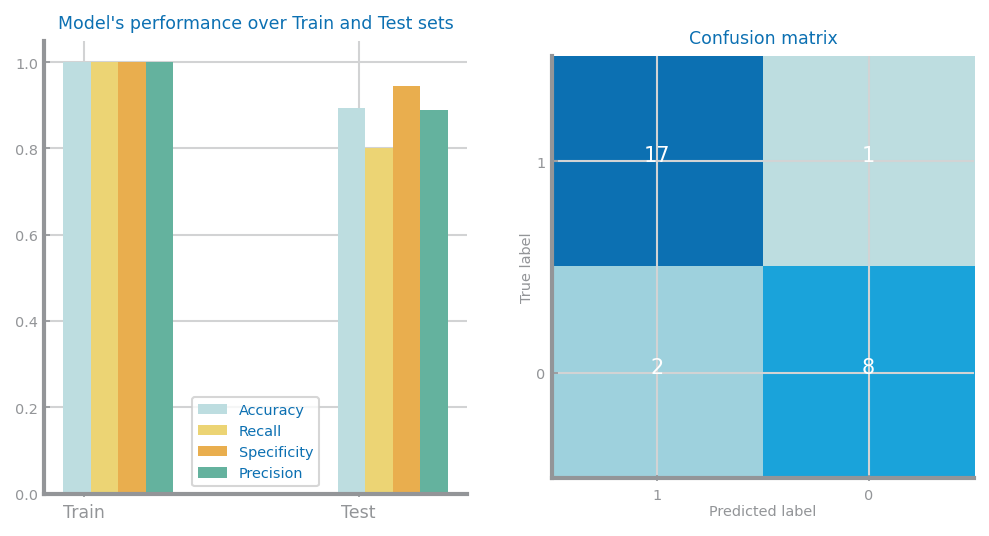

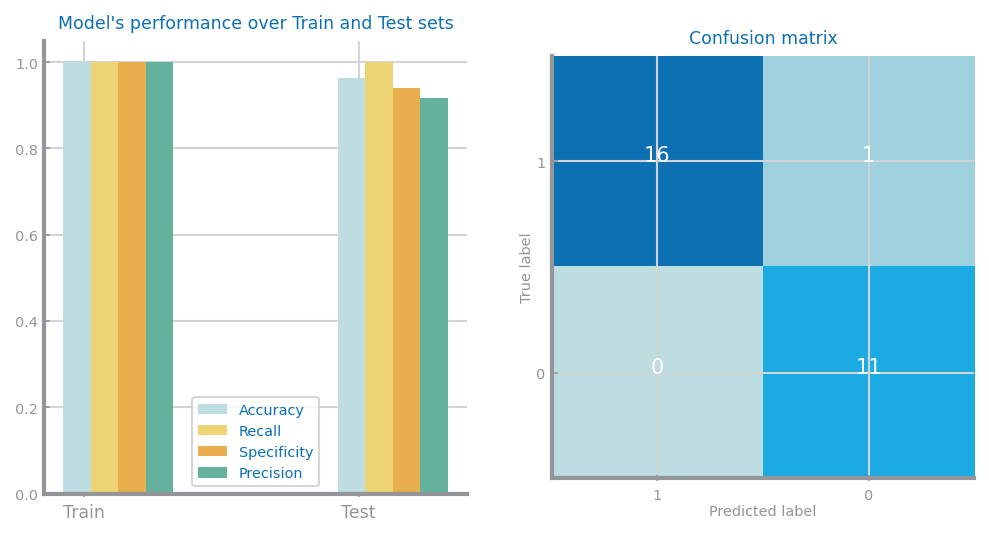

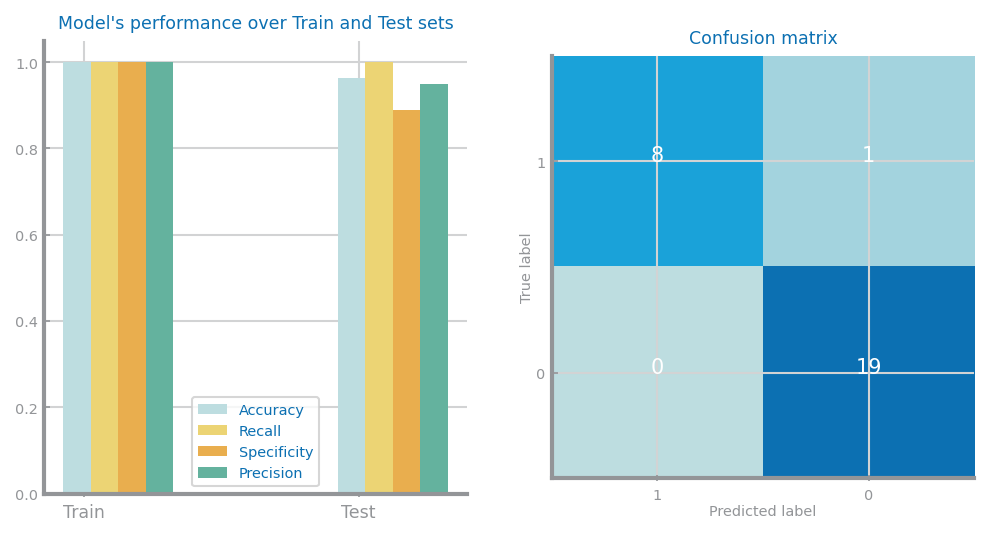

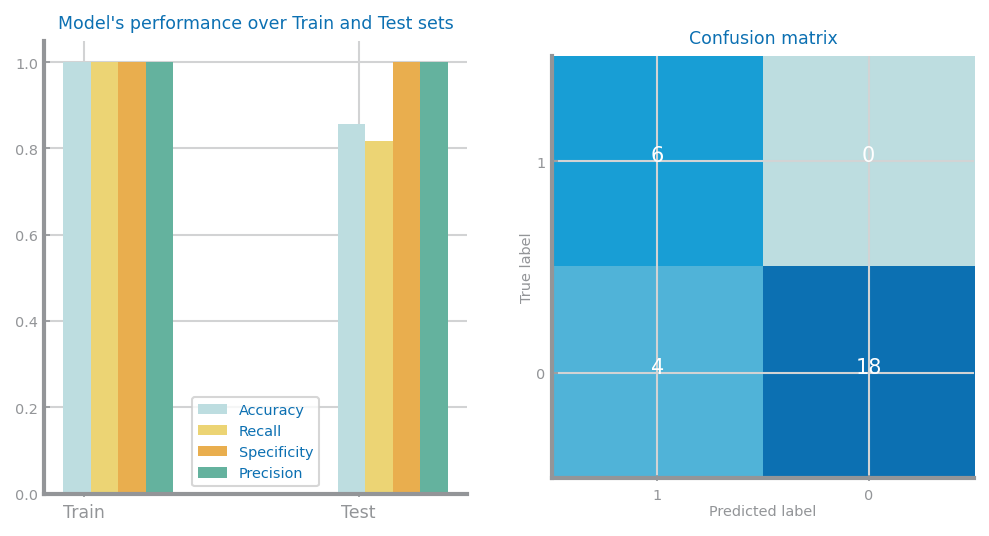

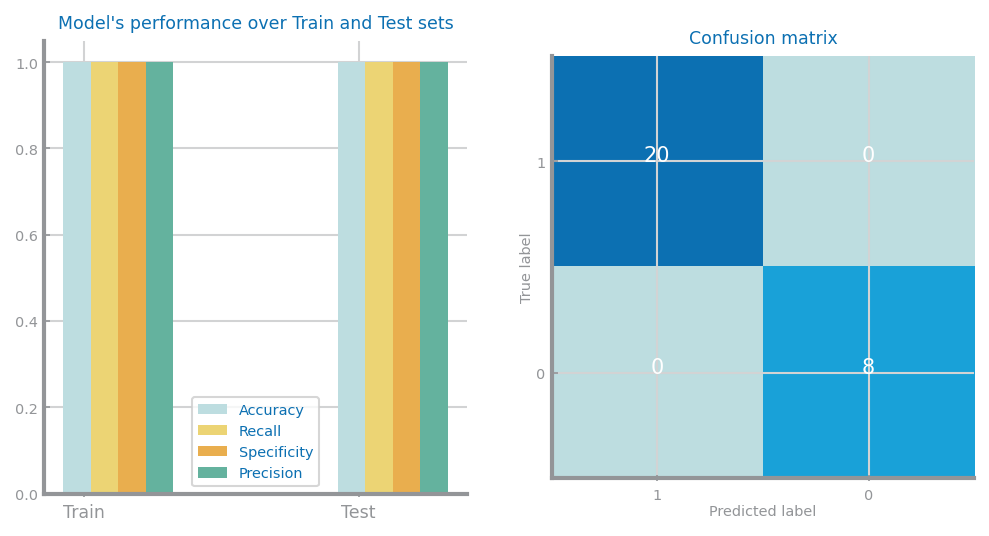

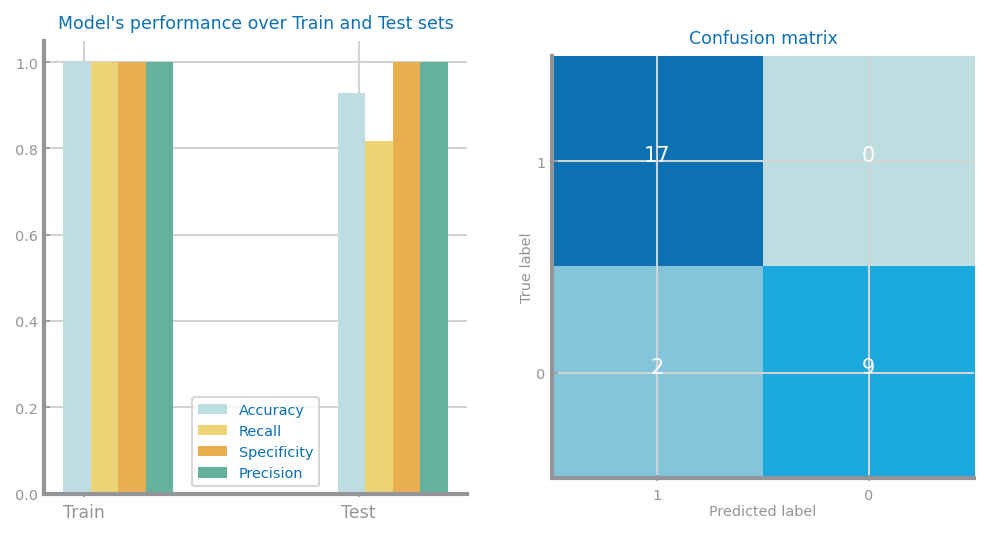

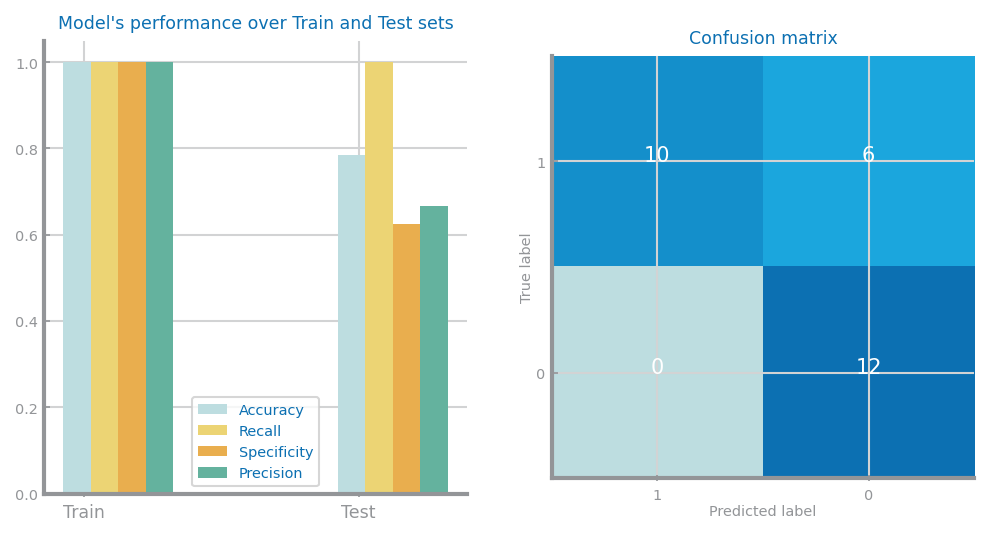

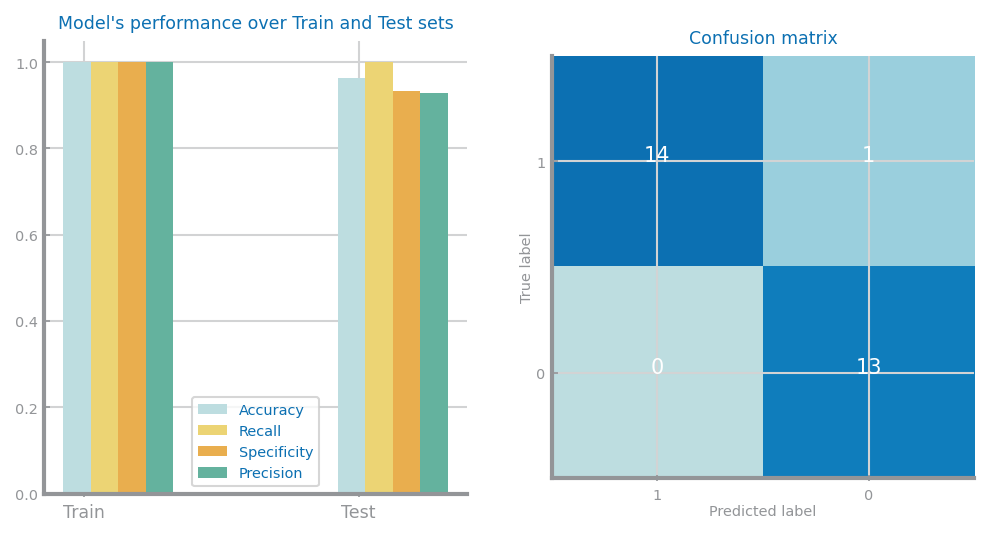

In [130]:
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.75, max_features=None, max_depth=5, random_state=0)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    
    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

<br/>
<br/>
<br/>
<br/>
<br/>

## Heart Failure Prediction Dataset - Standardized + Mixed + Outlier + Balancing

### Imports

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FMixed_outlierTrim_IQS_B.csv')

### Holdout

In [135]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FMixed_outlierTrim_IQS_B.csv')
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score (Training): 0.892
Accuracy score (Test): 0.827

Learning rate:  0.075
Accuracy score (Training): 0.892
Accuracy score (Test): 0.837

Learning rate:  0.1
Accuracy score (Training): 0.938
Accuracy score (Test): 0.856

Learning rate:  0.25
Accuracy score (Training): 0.963
Accuracy score (Test): 0.865

Learning rate:  0.5
Accuracy score (Training): 0.992
Accuracy score (Test): 0.865

Learning rate:  0.75
Accuracy score (Training): 0.996
Accuracy score (Test): 0.894

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.875



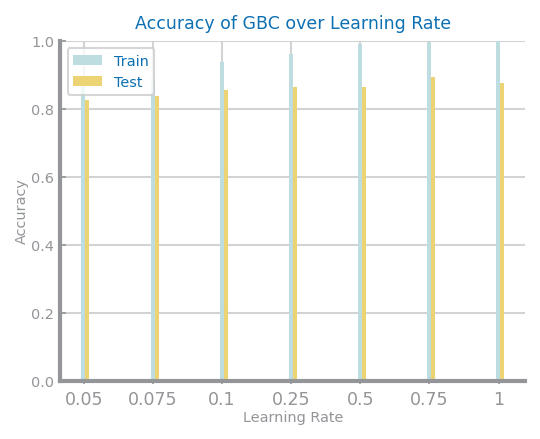

In [136]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = {"Train":[], "Test":[]}
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.904

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.904

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.865

Learning rate:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.894



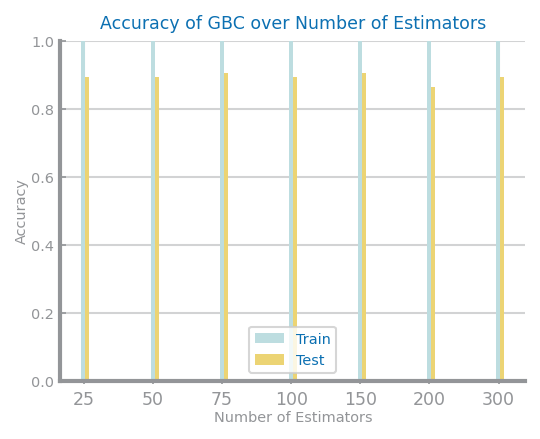

In [137]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = {"Train":[], "Test":[]}
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=0.75, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.904

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.875

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.846

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.846

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.837

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.846

Max Depth:  1
Accuracy score (Training): 1.000
Accuracy score (Test): 0.837



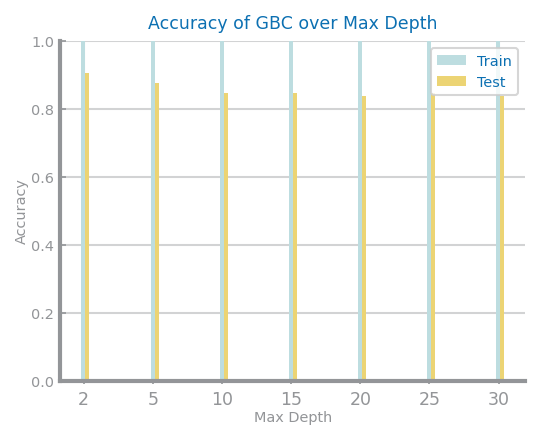

In [138]:
max_depth = [2, 5, 10, 15, 20, 25, 30]

xValues = ["2", "5", "10", "15", "20", "25", "30"]
yValues = {"Train":[], "Test":[]}
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=75, learning_rate=0.75, max_features=None, max_depth=depth, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Max Depth: ", learning_rate)
    print("Accuracy score (Training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    yValues["Train"].append(gb_clf.score(X_train, y_train))
    yValues["Test"].append(gb_clf.score(X_test, y_test))

    print()

    
plt.figure()
ds.multiple_bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 2 ; No Estimators = 75 ; Learning Rate = 0.75

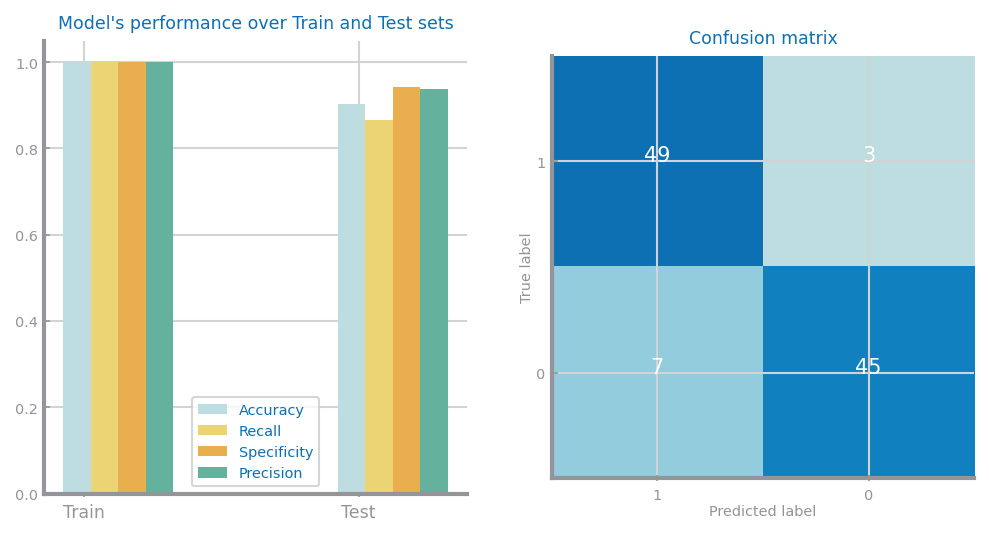

In [139]:
gb_clf = GradientBoostingClassifier(n_estimators=75, learning_rate=0.75, max_features=None, max_depth=2, random_state=0)

gb_clf.fit(X_train, y_train)
prd_trn = gb_clf.predict(X_train)
prd_tst = gb_clf.predict(X_test)

ds.plot_evaluation_results(labels, y_train, prd_trn, y_test, prd_tst)

### KFold

In [140]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FMixed_outlierTrim_IQS_B.csv')
    
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
    
kf = KFold(n_splits = 10, shuffle=True)

#### Learning Rate
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

Learning rate:  0.05
Accuracy score: 0.846

Learning rate:  0.075
Accuracy score: 0.852

Learning rate:  0.1
Accuracy score: 0.855

Learning rate:  0.25
Accuracy score: 0.890

Learning rate:  0.5
Accuracy score: 0.893

Learning rate:  0.75
Accuracy score: 0.884

Learning rate:  1
Accuracy score: 0.875



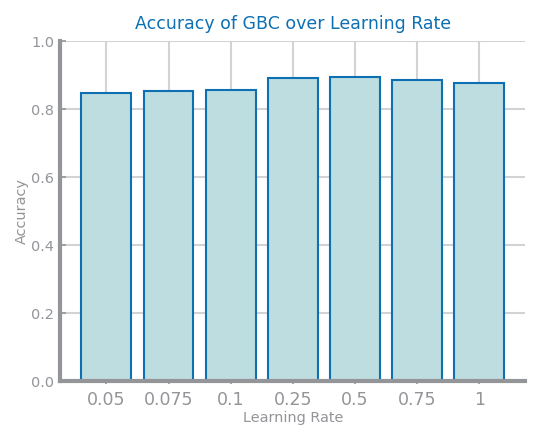

In [142]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] #Let's try to use several learning rates

xValues = ["0.05", "0.075", "0.1", "0.25", "0.5", "0.75", "1"]
yValues = []
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()
    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Learning Rate", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Learning Rate')

#### Number of Estimators
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

NUmber of Estimators:  1
Accuracy score: 0.881

NUmber of Estimators:  1
Accuracy score: 0.904

NUmber of Estimators:  1
Accuracy score: 0.901

NUmber of Estimators:  1
Accuracy score: 0.889

NUmber of Estimators:  1
Accuracy score: 0.892

NUmber of Estimators:  1
Accuracy score: 0.866

NUmber of Estimators:  1
Accuracy score: 0.890



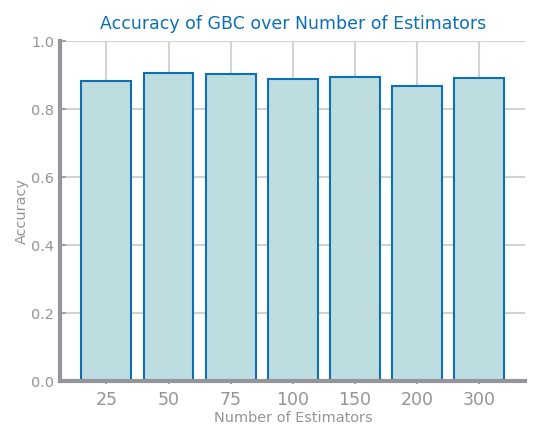

In [143]:
no_est = [25, 50, 75, 100, 150, 200, 300]

xValues = ["25", "50", "75", "100", "150", "200", "300"]
yValues = []
for no_estimators in no_est:
    gb_clf = GradientBoostingClassifier(n_estimators=no_estimators, learning_rate=0.5, max_features=None, max_depth=2, random_state=0)

    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("NUmber of Estimators: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Number of Estimators", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Number of Estimators')

#### Max Depth
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

Max Depth:  1
Accuracy score: 0.889

Max Depth:  1
Accuracy score: 0.895

Max Depth:  1
Accuracy score: 0.898

Max Depth:  1
Accuracy score: 0.864

Max Depth:  1
Accuracy score: 0.848

Max Depth:  1
Accuracy score: 0.875

Max Depth:  1
Accuracy score: 0.875



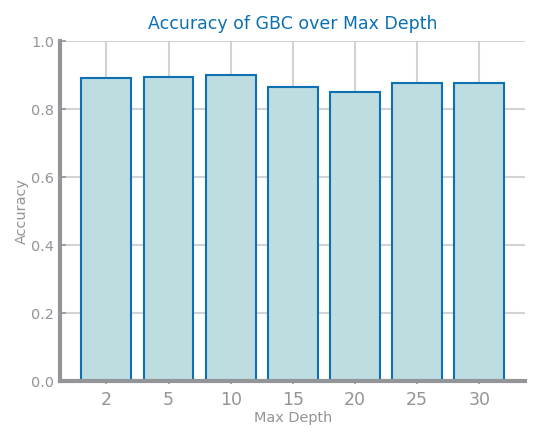

In [144]:
max_depth = [2, 5, 10, 15, 20, 25, 30]

xValues = ["2", "5", "10", "15", "20", "25", "30"]
yValues = []
for depth in max_depth:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_features=None, max_depth=depth, random_state=0)
    
    scores = cross_val_score(gb_clf, X, y, cv=kf)
    print("Max Depth: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(scores.mean()))
    yValues.append(scores.mean())
    print()

    
plt.figure()
ds.bar_chart(xValues, yValues, xlabel="Max Depth", ylabel="Accuracy", percentage=True, title='Accuracy of GBC over Max Depth')

#### Final - Max Depth = 5; No Estimators = 50 ; Learning Rate = 0.5

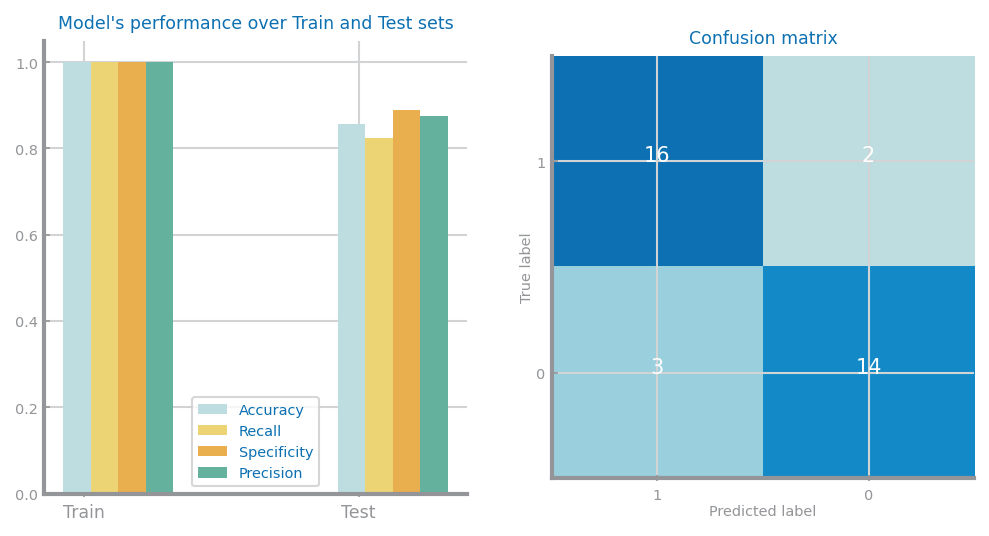

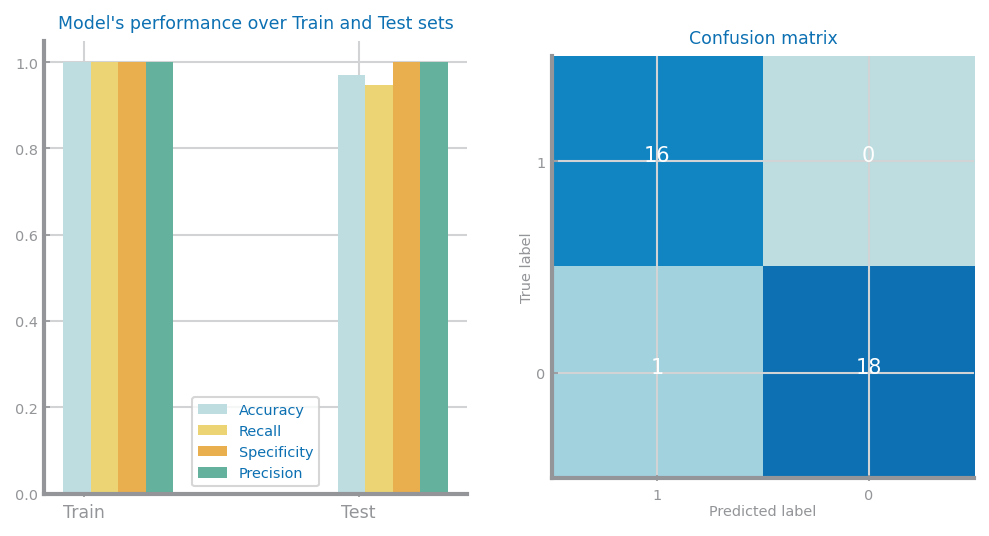

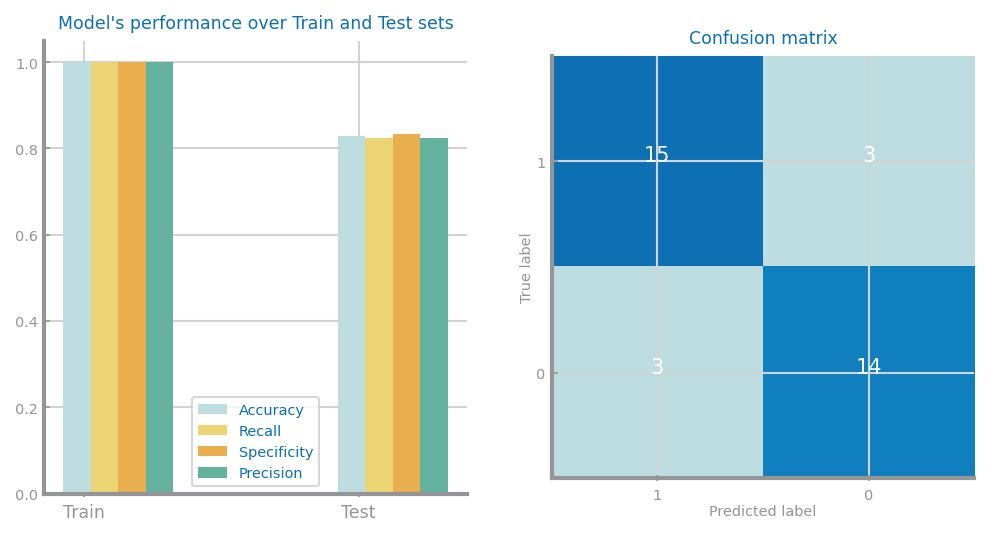

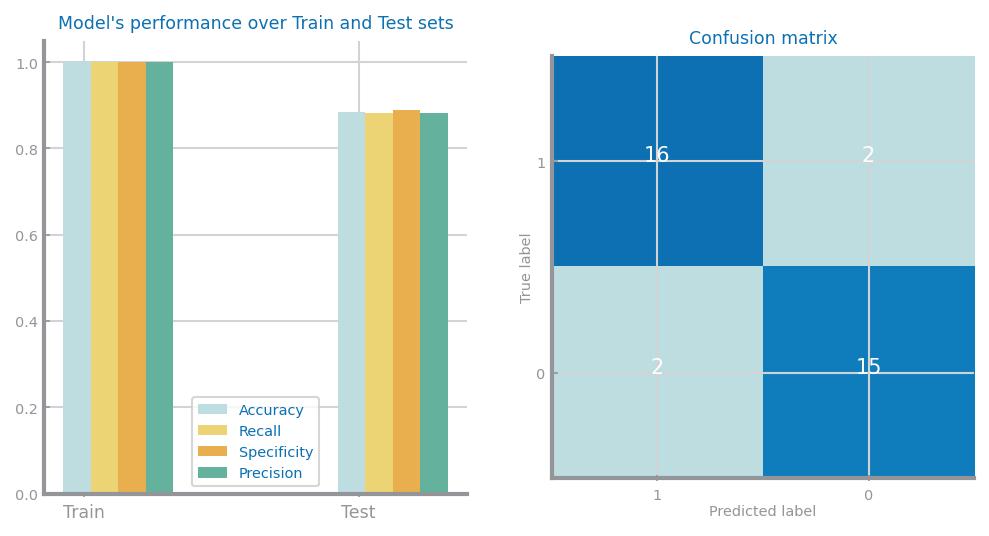

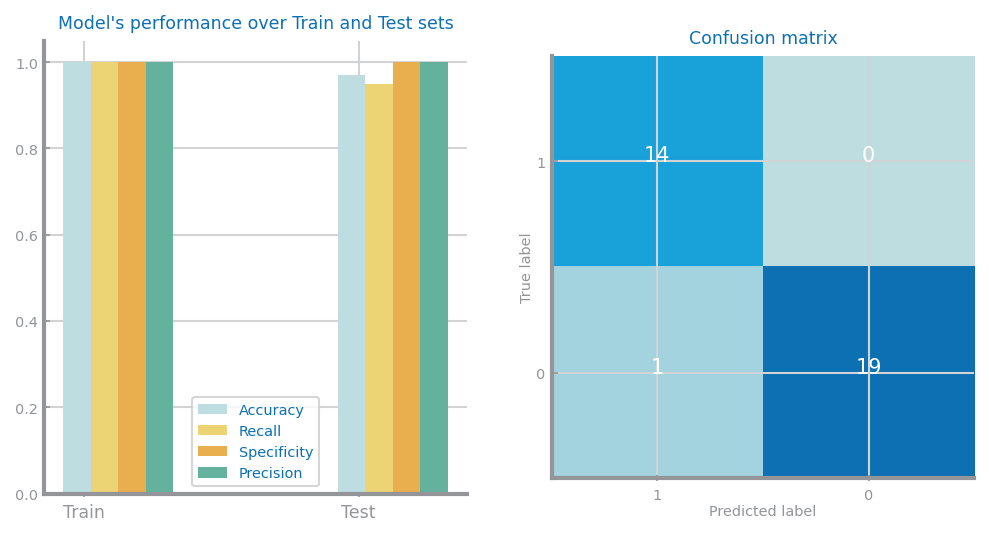

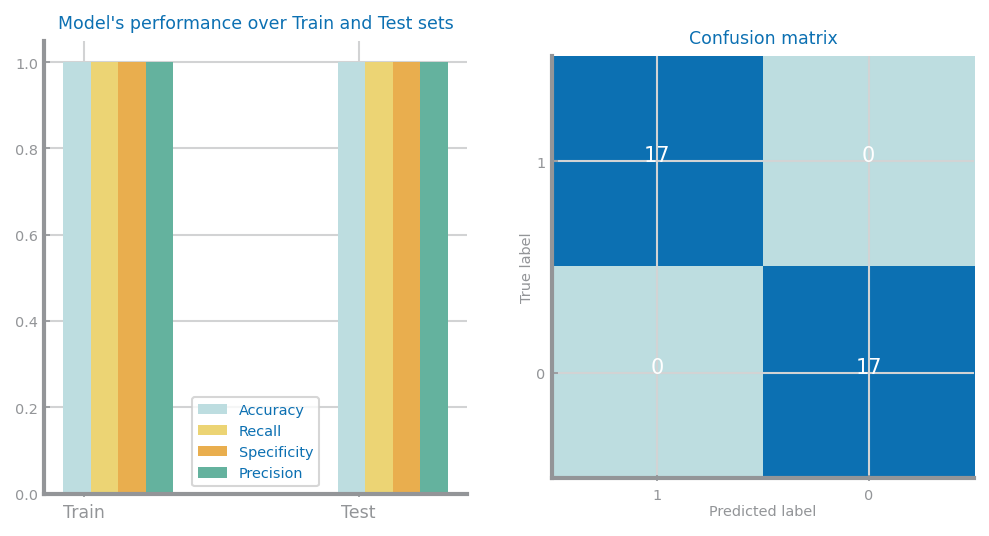

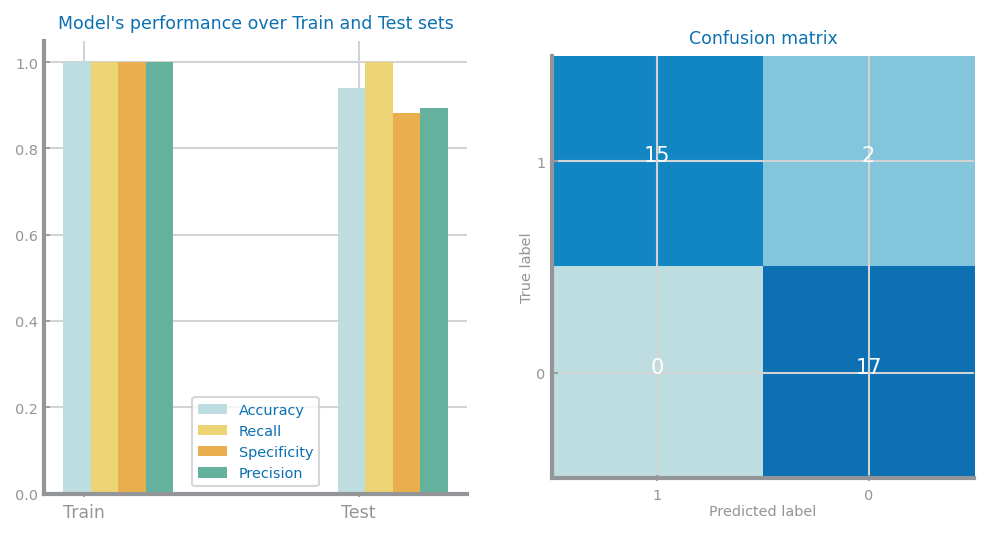

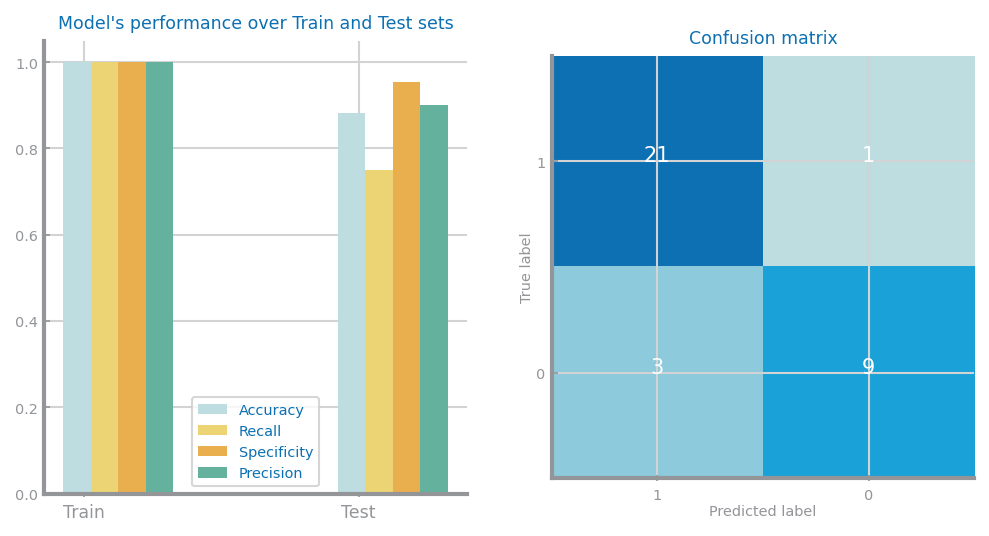

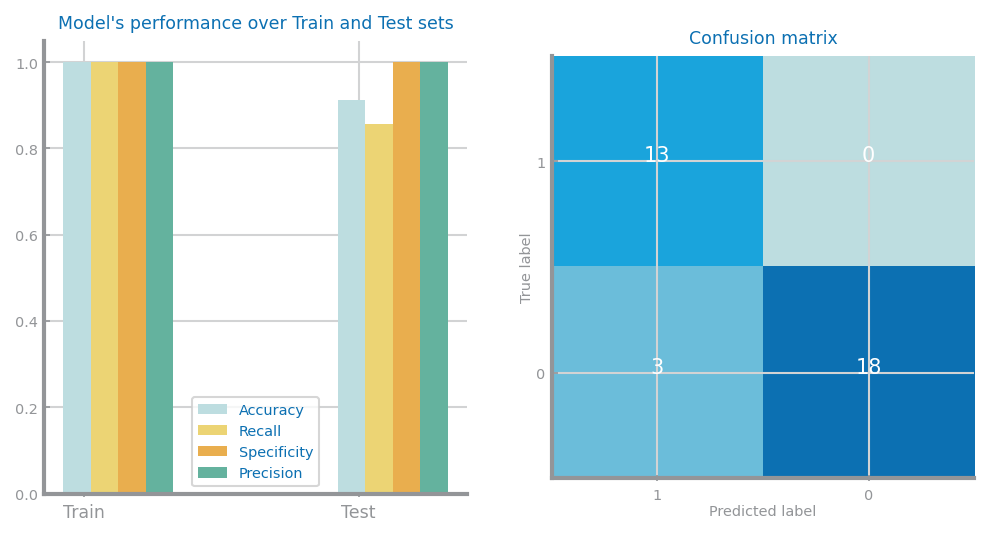

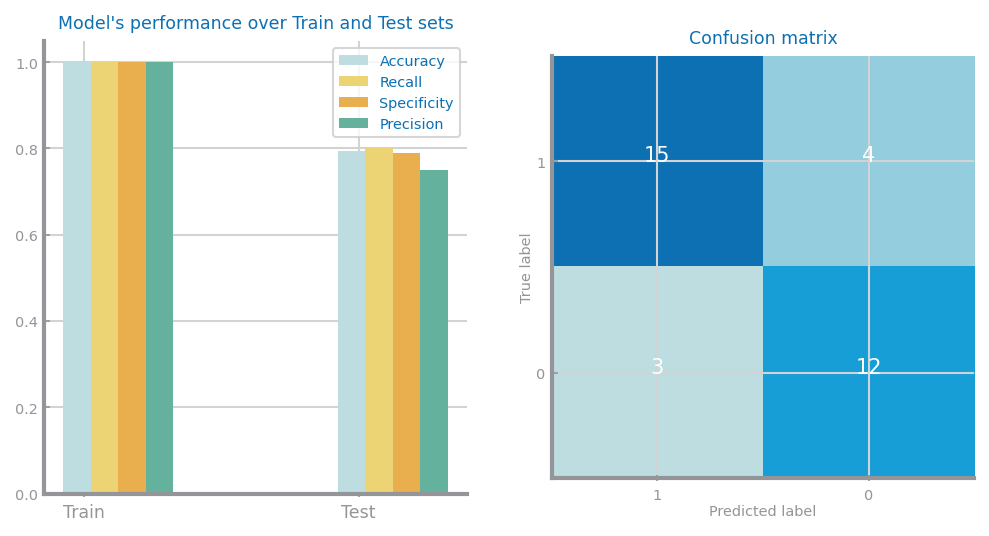

In [145]:
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_features=None, max_depth=5, random_state=0)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    
    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)